<div style="text-align: left; font-size: 16px;">
    <div style="text-align: left; display: inline-block; line-height: 2;">
        <ul style="list-style-type: none; padding: 0;">
            <li>RMIT UNIVERSITY VIETNAM</li>
            <li>School of Science, Engineering and Technology (SSET)</li>
            <li>COSC2968 | COSC3053 - Foundations of AI for STEM</li>
        </ul>
    </div>
</div>

<div style="text-align: center; font-size: 24px; margin-bottom: 5px; margin-top: 0px">
    <strong style="color: red;">Assignment 3 - OPTION A (PROGRAMMING): Machine Learning</strong>
</div>

<div style="text-align: center; font-size: 20px; margin-bottom: -10px">
    <div style="text-align: center; display: inline-block; line-height: 2;">
        <ul style="list-style-type: none; padding: 0;">
            <li><strong>- Lecture:</strong> Dr. Nhat-Quang Tran and Ms. Anh Van Le</li>
            <li style="text-align: left; display: inline-block; padding-left: 30px;">
                Tran Dong Nghi - S3914633
            </li>
            <li style="text-align: left; display: inline-block; padding-left: 30px;">
                Vo Thuy Khanh Ngoc - S3994909
            </li>
            <li style="text-align: left; display: inline-block; padding-left: 30px;">
                Ho Thanh Hoa - S4032968
            </li>
            <li style="text-align: left; display: inline-block; padding-left: 30px;">
                Park Chan Yong - S4021263
            </li>
            <li><strong>- Submission Due Date:</strong> 09.09.2024</li>
        </ul>
    </div>
</div>


<p style="text-align: center; font-size:16px; margin-left: 20px; line-height: 1.7; margin-top: -5px; margin-right: 30px;"><i>"I declare that in submitting all work for this assessment I have read, understood, and agree to the content and expectations of the <a href="https://www.rmit.edu.au/students/my-course/assessment-results/assessment" target="_blank">Assessment declaration</a>."</i></p>

# 0. IMPORT AND FUNCTIONS


In [1]:
# pip install scikit-learn # to install scikit-learn
# pip install pandas # to install pandas
# pip install numpy # to install numpy
# pip install matplotlib # to install matplotlib
# pip install joblib # to install joblib

# Import the required libraries
import pandas as pd  # Pandas library for tabular data processing
import numpy as np  # Numpy library for arithmetic operations
import matplotlib.pyplot as plt  # Matplotlib library for plotting
from sklearn.base import BaseEstimator, TransformerMixin  # Base for creating custom estimators and transformers
from sklearn.pipeline import FeatureUnion  # Combine multiple transformers into a feature union
from sklearn.pipeline import Pipeline  # Create and manage a series of processing steps
from sklearn.preprocessing import StandardScaler  # Transform data to have a mean of 0 and a standard deviation of 1
from sklearn.impute import SimpleImputer  # Replace missing values ​​with a simple method
from sklearn.preprocessing import OneHotEncoder  # Transform categorical variables into binary variables
from sklearn.model_selection import KFold  # Split data into training and test sets for cross-validation
from statistics import mean  # Calculate mean
from sklearn.model_selection import train_test_split
import joblib  # Save and load trained models
from pandas.plotting import scatter_matrix  # Create scatter matrix plots to visualize relationships between features
# Enable inline plotting for Jupyter notebooks
%matplotlib inline  
import graphviz  # For visualizing decision trees or graph-based models
import seaborn as sns  # For statistical data visualization
from scipy.stats import skew  # To calculate skewness in data (asymmetry of data distribution)
import warnings  # For managing warnings in the code

# 1. GET THE DATA. LOAD DATA

In [2]:
import pandas as pd  # Pandas library for tabular data processing

# Read data from CSV file
file_path = r'dataset/used_cars_100000.csv' 
import_data = pd.read_csv(file_path)

C:\Users\conhe\AppData\Local\Temp\ipykernel_15088\1924392148.py:5: DtypeWarning: Columns (9,40) have mixed types. Specify dtype option on import or set low_memory=False.
  import_data = pd.read_csv(file_path)


**DATASET OVERVIEW**
- The "US Used Cars Dataset" dataset is exported from Kaggle [1]
- The original number of samples of the dataset is 3000000 samples, however, due to the suitability of the device as well as the problem, the number of samples imported is 100000 samples.

- The number of features in the dataset is 62.

**ADD REASON FOR CHOOSING THIS DATASET**
- **Regression**: With the set of features (predictors) as well as the number of samples provided from the dataset, the output of the project will predict the price of a used car (target numerical value)

- **Number of samples and features**: With the amount provided including 100000 samples and 62 features, including both categorical and numerical features, this is a suitable data file.

- **Applicability**: With the goal of predicting the price of used cars, the project shows high usefulness in demonstrating how the regression technique works. The dataset also sheds light on the factors that influence used car prices in the US.

# 2. EXPLORATORY DATA ANALYSIS (EDA)

- The first step after obtaining the data is the EDA. EDA is described as the important process to synthesize the important things from the data file such as structure, important features, exceptions, anomalies, ...

- To perform these tasks, EDA includes simple techniques from using built-in functions of python to drawing charts from the original raw data. The charts will be diverse when showing the distribution of data, important values, ...

## 2.1 Data Quick Overview

In [3]:
print('\n> SOME FIRST DATA EXAMPLES')
import_data.head(3)


> SOME FIRST DATA EXAMPLES


,vin,back_legroom,bed,bed_length,body_type,cabin,city,city_fuel_economy,daysonmarket,dealer_zip,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,3FA6P0CD7KR139247,38.3 in,NaN,NaN,Sedan,NaN,Hearne,23.0,9,77859,...,A,Automatic,t81782,SEL,NaN,FWD,Front-Wheel Drive,112.2 in,83.5 in,2019
1,KM8J2CA45KU873168,38.2 in,NaN,NaN,SUV / Crossover,NaN,Goshen,22.0,88,46526,...,A,6-Speed Automatic,t83968,SE AWD,NaN,AWD,All-Wheel Drive,105.1 in,72.8 in,2019
2,JN8AS5MV8DW610608,35.3 in,NaN,NaN,SUV / Crossover,NaN,Forest,22.0,8,24551,...,CVT,Continuously Variable Transmission,t45170,SV AWD,NaN,AWD,All-Wheel Drive,105.9 in,70.9 in,2013


In [4]:
print('\n____________ DATASET INFO ____________')
print(import_data.info())       


____________ DATASET INFO ____________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 63 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   vin                      100000 non-null  object 
 1   back_legroom             94762 non-null   object 
 2   bed                      668 non-null     object 
 3   bed_length               14207 non-null   object 
 4   body_type                99517 non-null   object 
 5   cabin                    2150 non-null    object 
 6   city                     100000 non-null  object 
 7   city_fuel_economy        83690 non-null   float64
 8   daysonmarket             100000 non-null  int64  
 9   dealer_zip               100000 non-null  object 
 10  description              97370 non-null   object 
 11  engine_cylinders         96745 non-null   object 
 12  engine_displacement      94317 non-null   float64
 13  engine_type         

<table border="1" cellpadding="10" cellspacing="0" style="margin-left:auto; margin-right:auto;">
    <tr>
        <th colspan="4" style="text-align:center;"><strong>VEHICLE FEATURES AND DESCRIPTIONS</strong></th>
    </tr>
    <tr>
        <th colspan="4" style="text-align:center;"><strong>Basic Vehicle Information</strong></th>
    </tr>
    <tr>
        <td>vin</td>
        <td>Identification number of a vehicle.</td>
        <td>Not used</td>
        <td>Text data, not used for training.</td>
    </tr>
    <tr>
        <td>sp_id</td>
        <td>Service parts identification of a vehicle.</td>
        <td>Not used</td>
        <td>Text data, not used for training.</td>
    </tr>
    <tr>
        <td>description</td>
        <td>Additional details about the vehicle.</td>
        <td>Not used</td>
        <td>Text data, not used for training.</td>
    </tr>
    <tr>
        <td>major_options</td>
        <td>Main features of the vehicle.</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>make_name</td>
        <td>Indicates the brand of the vehicle.</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>model_name</td>
        <td>The specific model name.</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>body_type</td>
        <td>The type of body such as Sedan, SUV, Convertible, etc.</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>year</td>
        <td>The year the vehicle was manufactured.</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <th colspan="4" style="text-align:center;"><strong>Condition and Certification</strong></th>
    </tr>
    <tr>
        <td>has_accidents</td>
        <td>Indicates whether the vehicle has been in an accident.</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>fleet</td>
        <td>Decides if the vehicle is/was part of a vehicle group owned by a business.</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>franchise_dealer</td>
        <td>Indicates whether the vehicle is promoted by an authorized dealer of a manufacturer.</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>sp_name</td>
        <td>Name of the service parts manufacturer of a vehicle.</td>
        <td>Not used</td>
        <td>Text data, not used for training.</td>
    </tr>
    <tr>
        <td>mileage</td>
        <td>Distance traveled of the vehicle.</td>
        <td>Numerical</td>
    </tr>
    <tr>
        <td>franchise_make</td>
        <td>Name of the manufacturer produced this vehicle.</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>frame_damaged</td>
        <td>The condition of the vehicle's frame.</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>owner_count</td>
        <td>Number of past owners for this vehicle.</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>is_cpo</td>
        <td>Is the vehicle certified pre-owned.</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>is_oemcpo</td>
        <td>Is the vehicle OEM's certified pre-owned.</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>isCab</td>
        <td>Is the vehicle a cab.</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>salvage</td>
        <td>Is the vehicle a salvage vehicle.</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>theft_title</td>
        <td>Is the vehicle a theft vehicle.</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>is_new</td>
        <td>Is the vehicle new.</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <th colspan="4" style="text-align:center;"><strong>Performance and Fuel Economy</strong></th>
    </tr>
    <tr>
        <td>city_fuel_economy</td>
        <td>Fuel economy in the city.</td>
        <td>Numeric</td>
    </tr>
    <tr>
        <td>highway_fuel_economy</td>
        <td>Fuel economy on the highway.</td>
        <td>Numeric</td>
    </tr>
    <tr>
        <td>fuel_tank_volume</td>
        <td>Volume of the fuel tank.</td>
        <td>Numeric</td>
    </tr>
    <tr>
        <td>engine_cylinders</td>
        <td>Engine configuration of the vehicle.</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>engine_displacement</td>
        <td>Engine displacement.</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>engine_type</td>
        <td>Engine model of the vehicle.</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>Power</td>
        <td>Engine power, including horsepower and RPM.</td>
        <td>Categorical</td>
    <tr>
        <td>horsepower</td>
        <td>Engine power.</td>
        <td>Numeric</td>
    </tr>
    <tr>
        <td>torque</td>
        <td>Engine torque.</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <th colspan="4" style="text-align:center;"><strong>Price and Value Information</strong></th>
    </tr>
    <tr>
        <td>price</td>
        <td>Price of the vehicle.</td>
        <td>Numeric</td>
    </tr>
    <tr>
        <td>daysonmarket</td>
        <td>Days since the dealer first posted the vehicle for sale.</td>
        <td>Numeric</td>
    </tr>
    <tr>
        <td>listing_id</td>
        <td>ID of the vehicle on the market.</td>
        <td>Not used</td>
        <td>Text data, not used for training.</td>
    </tr>
    <tr>
        <td>listed_date</td>
        <td>Date that the vehicle was listed on the market by a dealer.</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>savings_amount</td>
        <td>Savings when buying the vehicle.</td>
        <td>Numeric</td>
    </tr>
    <tr>
        <td>seller_rating</td>
        <td>Seller rating.</td>
        <td>Numeric</td>
    </tr>
    <tr>
        <th colspan="4" style="text-align:center;"><strong>Dimensions and Space Information</strong></th>
    </tr>
    <tr>
        <td>length</td>
        <td>Length of the vehicle.</td>
        <td>Numeric</td>
    </tr>
    <tr>
        <td>width</td>
        <td>Width of the vehicle.</td>
        <td>Numeric</td>
    </tr>
    <tr>
        <td>height</td>
        <td>Height of the vehicle.</td>
        <td>Numeric</td>
    </tr>
    <tr>
        <td>front_legroom</td>
        <td>Front legroom.</td>
        <td>Numeric</td>
    </tr>
    <tr>
        <td>back_legroom</td>
        <td>Back legroom.</td>
        <td>Numeric</td>
    </tr>
    <tr>
        <td>maximum_seating</td>
        <td>Number of seats in the vehicle.</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>wheelbase</td>
        <td>Distance between the front and rear axles.</td>
        <td>Numeric</td>
    </tr>
    <tr>
        <th colspan="4" style="text-align:center;"><strong>Geographic and Location Information</strong></th>
    </tr>
    <tr>
        <td>city</td>
        <td>City where the vehicle is listed.</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>dealer_zip</td>
        <td>Zip code of the dealer selling the vehicle.</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>latitude</td>
        <td>Geographic location of the dealer.</td>
        <td>Numeric</td>
    </tr>
    <tr>
        <td>longitude</td>
        <td>Geographic location of the dealer.</td>
        <td>Numeric</td>
    </tr>
    <tr>
        <th colspan="4" style="text-align:center;"><strong>Additional Features</strong></th>
    </tr>
    <tr>
        <td>bed</td>
        <td>Type of bed, if applicable (e.g., truck bed).</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>bed_length</td>
        <td>Length of the bed.</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>cabin</td>
        <td>Type of cabin (e.g., extended, crew).</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>exterior_color</td>
        <td>Color of the vehicle's exterior.</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>listing_color</td>
        <td>Color of the vehicle.</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>interior_color</td>
        <td>Color of the vehicle's interior.</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>fuel_type</td>
        <td>Type of fuel used by the vehicle.</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>transmission</td>
        <td>Transmission type of the vehicle.</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>transmission_display</td>
        <td>Transmission type displayed.</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>trimId</td>
        <td>Identifier for the trim level of the vehicle.</td>
        <td>Not used</td>
        <td>Text data, not used for training.</td>
    </tr>
    <tr>
        <td>trim_name</td>
        <td>Name of the trim level of the vehicle.</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>vehicle_damage_category</td>
        <td>Category of any damage the vehicle has.</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>wheel_system</td>
        <td>Type of wheel system (e.g., AWD, FWD, RWD).</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <td>wheel_system_display</td>
        <td>Display name of the wheel system.</td>
        <td>Categorical</td>
    </tr>
    <tr>
        <th colspan="4" style="text-align:center;"><strong>Unstructured Data</strong></th>
    </tr>
    <tr>
        <td>main_picture_url</td>
        <td>URL of the main picture of the vehicle.</td>
        <td>Not used</td>
        <td>Text data, not used for training.</td>
    </tr>
</table>

In [5]:
print('\n___ COUNTS ON A FEATURE ___')
print(import_data['make_name'].value_counts()) 


___ COUNTS ON A FEATURE ___
make_name
Ford           15581
Chevrolet      12411
Toyota          8075
Nissan          7274
Honda           7115
               ...  
Kaiser             1
Hudson             1
Geo                1
MG                 1
Pininfarina        1
Name: count, Length: 62, dtype: int64


In [6]:
print('\n > STATISTICS OF NUMERIC FEATURES (Data identified by the system has not been processed)')
import_data.describe()


 > STATISTICS OF NUMERIC FEATURES (Data identified by the system has not been processed)


,city_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,latitude,listing_id,longitude,mileage,owner_count,price,savings_amount,seller_rating,sp_id,vehicle_damage_category,year
count,83690.000000,100000.000000,94317.000000,83690.000000,94317.000000,100000.000000,1.000000e+05,100000.000000,95213.000000,49268.000000,1.000000e+05,100000.000000,98698.000000,99995.000000,0.0,100000.00000
mean,22.717732,76.366220,2966.308301,29.483224,247.750904,36.996173,2.754736e+08,-90.672007,31092.105868,1.534627,2.994217e+04,550.043680,4.270902,232883.266403,NaN,2017.73366
std,8.852685,109.736069,1349.561363,7.849628,90.713339,5.009750,8.972840e+06,13.934621,45371.735872,0.918171,2.000661e+04,1101.258288,0.511567,132356.793600,NaN,4.17028
min,8.000000,0.000000,700.000000,11.000000,70.000000,18.346700,7.267606e+07,-157.902000,0.000000,1.000000,3.490000e+02,0.000000,1.000000,41593.000000,NaN,1923.00000
25%,18.000000,14.000000,2000.000000,25.000000,174.000000,33.509475,2.745842e+08,-97.112100,6.000000,1.000000,1.841175e+04,0.000000,4.000000,63237.000000,NaN,2017.00000
50%,21.000000,36.000000,2500.000000,29.000000,243.000000,37.920500,2.785347e+08,-87.249500,7664.000000,1.000000,2.638450e+04,0.000000,4.342857,281446.000000,NaN,2020.00000
75%,26.000000,82.000000,3600.000000,33.000000,300.000000,41.024800,2.804506e+08,-80.391400,43769.000000,2.000000,3.820850e+04,775.000000,4.605263,336012.000000,NaN,2020.00000
max,127.000000,2499.000000,8400.000000,127.000000,808.000000,48.861600,2.820027e+08,-66.109800,386120.000000,15.000000,1.390000e+06,80112.000000,5.000000,440556.000000,NaN,2021.00000


## 2.2 Data Preprocessing for Visualization
### 2.2.1 Categorical Conversion

In [7]:
# Danh sách các cột Boolean cần chuyển đổi
bool_cols = ['isCab', 'is_oemcpo', 'is_cpo', 'is_new', 'vehicle_damage_category']

# Thay thế NaN bằng False trước khi chuyển đổi
import_data[bool_cols] = import_data[bool_cols].fillna(False).astype(int)

import_data['owner_count'] = import_data['owner_count'].astype('category')  # Convert 'owner_count' column to category type
import_data['engine_displacement'] = import_data['engine_displacement'].astype('category')  # Convert 'engine_displacement' column to category type
import_data['maximum_seating'] = import_data['maximum_seating'].astype('category')  # Convert 'maximum_seating' column to category type
import_data['year'] = import_data['year'].astype('category')  # Convert 'year' column to category type
import_data['bed_length'] = import_data['bed_length'].astype('category')  # Convert 'bed_length' column to category type

C:\Users\conhe\AppData\Local\Temp\ipykernel_15088\349836255.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  import_data[bool_cols] = import_data[bool_cols].fillna(False).astype(int)


### 2.2.2 Numerical Conversion

In [8]:
# Define a function to extract numeric values and remove units
def convert_to_numeric(value):
    try:
        # Remove the unit (e.g., 'in') and convert to float
        return float(value.split()[0])
    except:
        return None  # Handle cases where conversion might fail

# Apply the function to the specified columns
import_data['bed_length'] = import_data['bed_length'].apply(convert_to_numeric)
import_data['wheelbase'] = import_data['wheelbase'].apply(convert_to_numeric)
import_data['back_legroom'] = import_data['back_legroom'].apply(convert_to_numeric)
import_data['front_legroom'] = import_data['front_legroom'].apply(convert_to_numeric)
import_data['width'] = import_data['width'].apply(convert_to_numeric)
import_data['height'] = import_data['height'].apply(convert_to_numeric)
import_data['length'] = import_data['length'].apply(convert_to_numeric)
import_data['fuel_tank_volume'] = import_data['fuel_tank_volume'].apply(convert_to_numeric)

# Function to split torque data into torque value and RPM
def split_torque(torque_str):
    try:
        torque_value = float(torque_str.split(' ')[0])
        rpm_value = int(torque_str.split('@')[1].strip().split(' ')[0].replace(',', ''))
        return pd.Series([torque_value, rpm_value])
    except (AttributeError, IndexError, ValueError):
        return pd.Series([np.nan, np.nan])

# Apply the split_torque function to the torque column
import_data[['torque_value', 'torque_rpm']] = import_data['torque'].apply(lambda x: split_torque(x) if isinstance(x, str) else pd.Series([np.nan, np.nan]))

# Combine using product and replace the original torque column
import_data['torque'] = import_data['torque_value'] * import_data['torque_rpm']

# Drop the temporary torque_value and torque_rpm columns
import_data.drop(columns=['torque_value', 'torque_rpm'], inplace=True)

### 2.2.3 Column Removing Process

In [9]:
# Remove unused features
data_visualization = import_data.drop(columns=['vin', 'description', 'listing_id', 'main_picture_url', 'sp_id', 'sp_name', 'trimId'])

## 2.3 Data Distribution 

- **Analyzing the data distribution** is one of the most important steps in the EDA section because it greatly affects the following steps. In this section, histogram and box plot will be used to check the distribution of data.

### 2.3.1 Histogram

- A histogram is a chart that plots the distribution of a numeric variable’s values as a series of bars. [2]

- Data is well distributed when the histogram represents the probability of data in a bell shape, not skewed left or right (in **some** cases skewing is acceptable)

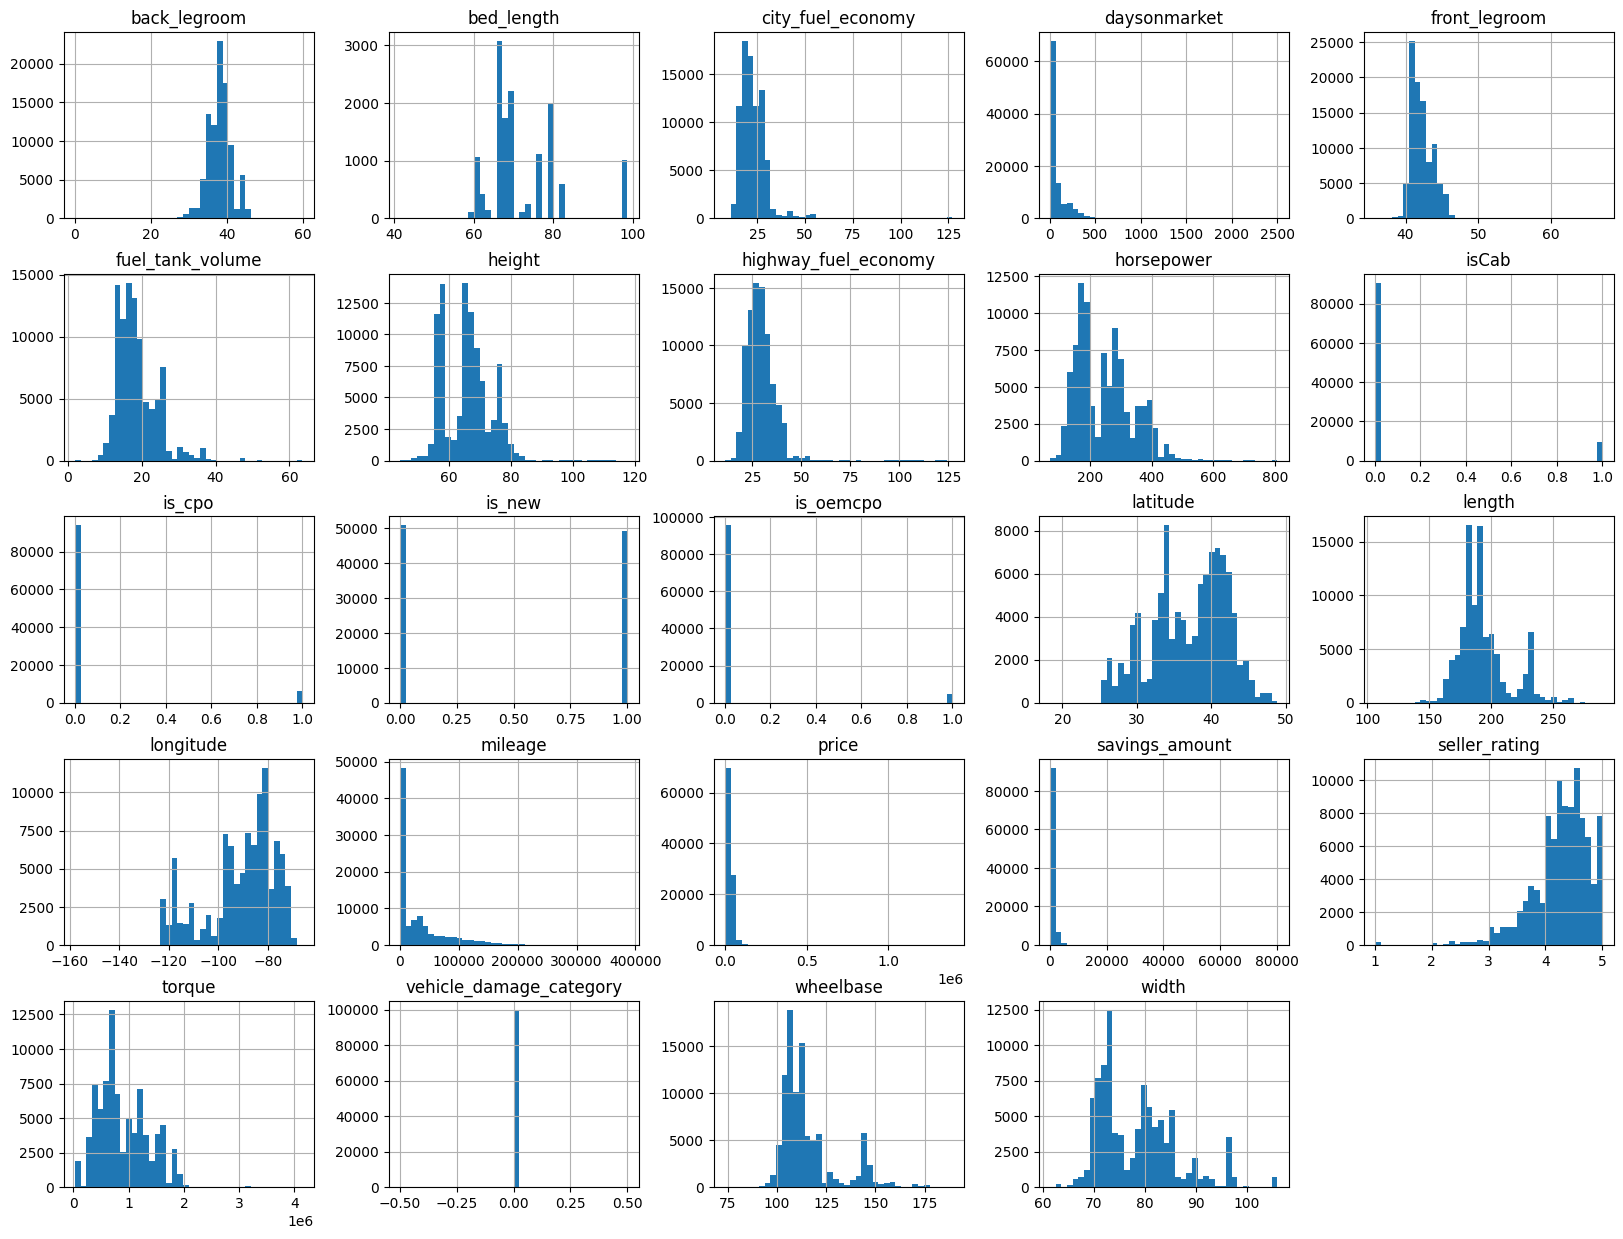

In [10]:
# Create histograms for each feature with 40 bins and a figure size of 20x15 inches.
data_visualization.hist(bins=40, figsize=(20, 15))

# Uncomment to save the histogram as a PNG file with 300 dpi resolution.
# plt.savefig('Figures/hist_import_data.png', format='png', dpi=300)

# Show the histogram plots.
plt.show()

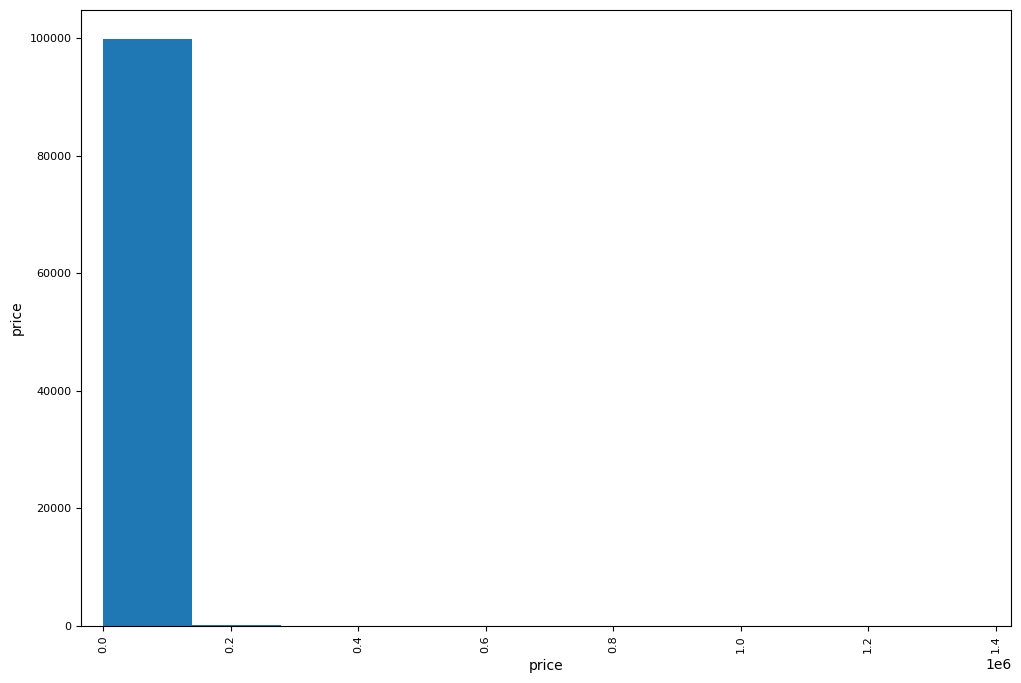

In [11]:
# Create a scatter matrix for the 'price' feature (only one feature, so the matrix will just be a histogram)
features_to_plot = ["price"]
scatter_matrix(import_data[features_to_plot], figsize=(12, 8))  # Note: histograms are on the main diagonal

# Uncomment to set axis limits (if needed)
# plt.axis([0, 1000000, 0, 120000])

# Show the scatter matrix.
plt.show()

### 2.3.2 Bot Plotting

- A box plot uses boxes and lines to depict the distributions of one or more groups of numeric data. 

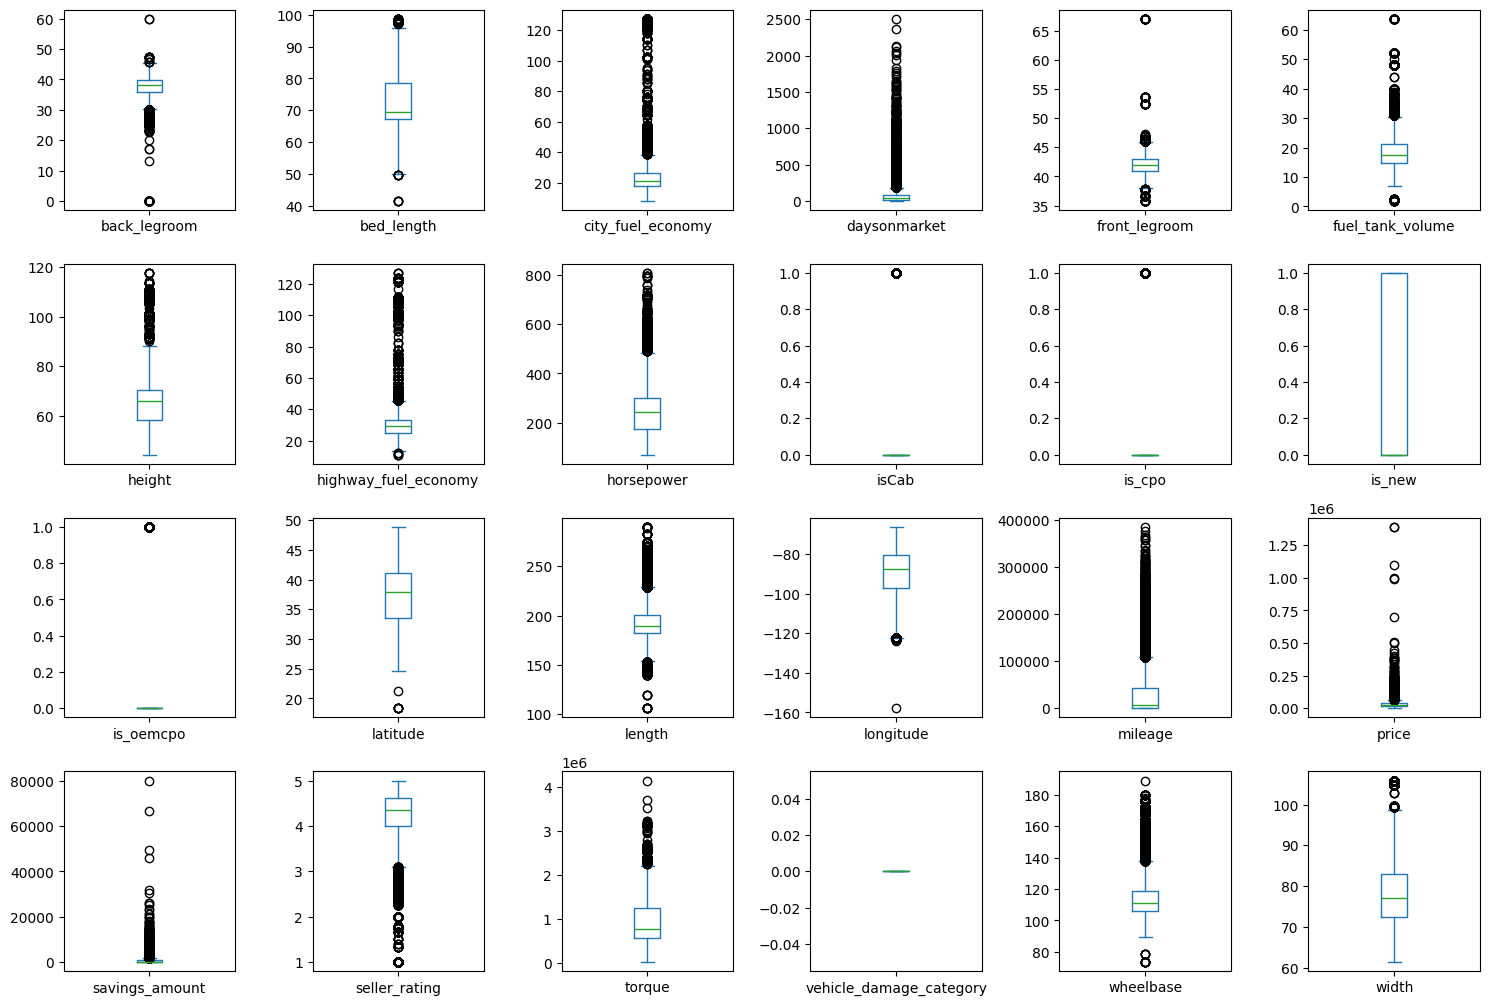

In [12]:
# Create box plots for each feature with individual subplots
data_visualization.plot(kind='box', subplots=True, layout=(6, 6), figsize=(15, 15), sharex=False, sharey=False)

# Adjust spacing between subplots for better visualization
plt.tight_layout()

# Uncomment to save the box plots as a PNG file with 300 dpi resolution.
# plt.savefig('Figures/box_import_data.png', format='png', dpi=300)

# Show the box plots.
plt.show()

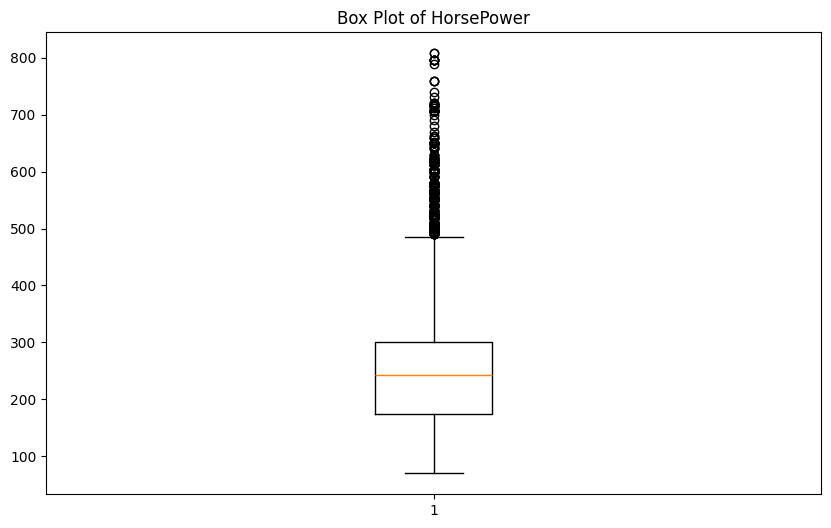

In [13]:
# Create a box plot for the 'price' feature
plt.figure(figsize=(10, 6))
plt.boxplot(import_data['horsepower'].dropna(), notch=False, vert=True)
plt.title('Box Plot of HorsePower')  # Add a title to the plot

# Uncomment to save the box plot as a PNG file with 300 dpi resolution.
# plt.savefig('Figures/box_car_HorsePower.png', format='png', dpi=300)

# Show the box plot.
plt.show()

- Take the box 'horsepower' as an example to clearly understand the use of the box:

    - The line in the middle of the box represents the median of the feature.

    - The top and bottom edges of the box show the percentiles, which are .75 and .25, respectively. 
    
    - The height of the box represents the interquartile range (IQR).

    - The top and bottom dashes of the image ( —| ) are the upper and lower thresholds.

    - Data points (black circles) that fall outside the upper and lower thresholds represent outliers.

## 2.5 Scatter matrix for pair(s) of features

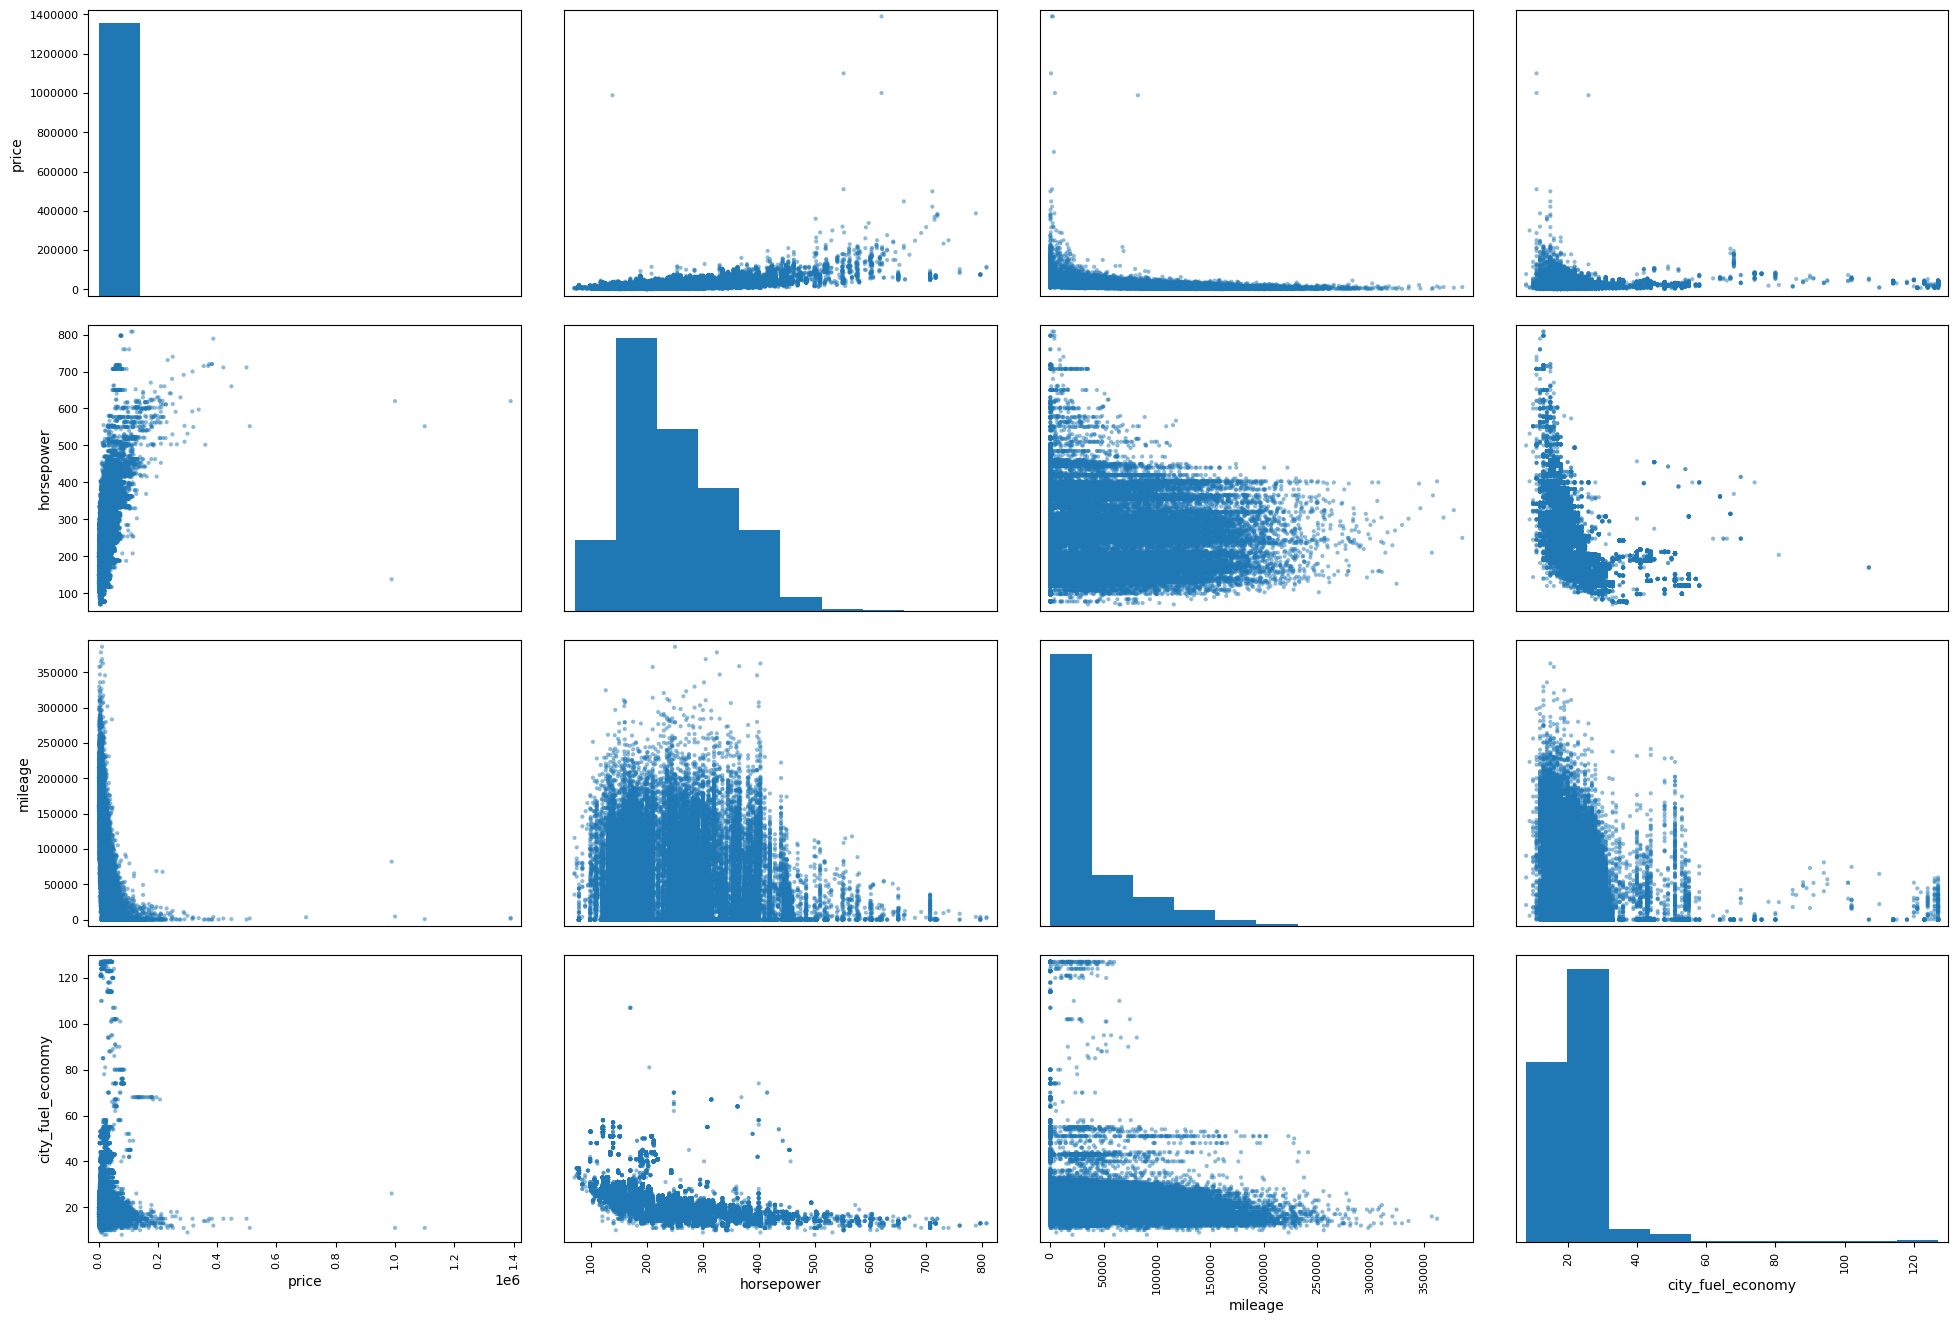

In [14]:
# Define the important features to plot
features_to_plot = ["price", "horsepower", "mileage", "city_fuel_economy", "engine_displacement"]

# Create a scatter matrix for the specified features
scatter_matrix(import_data[features_to_plot], figsize=(24, 16), diagonal='hist')

# Adjust spacing between cells in the scatter matrix
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Uncomment to save the scatter matrix as a PNG file with 300 dpi resolution.
# plt.savefig('Figures/scatter_mat_all_feat.png', format='png', dpi=300)

# Show the scatter matrix.
plt.show()


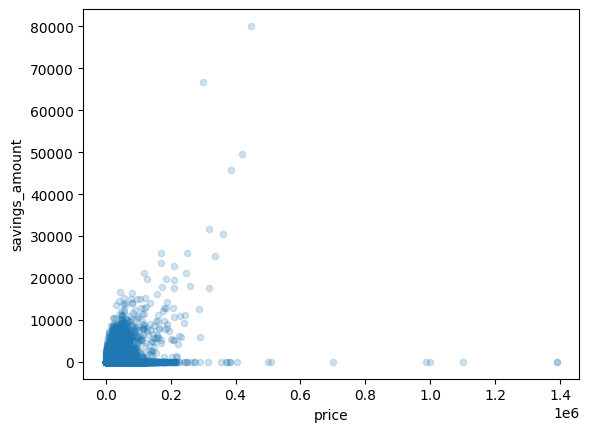

In [15]:
# Create a scatter plot with 'price' on the x-axis and 'savings_amount' on the y-axis
import_data.plot(kind="scatter", y="savings_amount", x="price", alpha=0.2)

# Uncomment to save the scatter plot as a PNG file with 300 dpi resolution.
# plt.savefig('figures/scatter_1_feat.png', format='png', dpi=300)

# Show the scatter plot.
plt.show()

## 2.6 Correlation Analysis

In [16]:
# Calculate the correlation matrix for the numeric columns in the DataFrame
# This matrix shows the correlation coefficients between each pair of numeric features
corr_matrix = data_visualization.corr(numeric_only=True)

# Print the correlation matrix to view the relationships between features
corr_matrix

,back_legroom,bed_length,city_fuel_economy,daysonmarket,franchise_dealer,front_legroom,fuel_tank_volume,height,highway_fuel_economy,horsepower,...,length,longitude,mileage,price,savings_amount,seller_rating,torque,vehicle_damage_category,wheelbase,width
back_legroom,1.000000,-0.107647,-0.213960,-0.024072,0.132698,-0.002262,0.383144,0.471377,-0.270834,0.340362,...,0.438215,0.018414,-0.142607,0.326594,-0.040422,0.010583,0.317537,NaN,0.422699,0.362546
bed_length,-0.107647,1.000000,-0.201007,0.042850,-0.095466,-0.000448,0.635913,0.471827,-0.139558,0.316023,...,0.652158,0.006456,0.113386,0.044037,0.059822,0.025272,0.118734,NaN,0.603911,0.226875
city_fuel_economy,-0.213960,-0.201007,1.000000,0.006447,0.054287,0.001577,-0.710701,-0.545900,0.941674,-0.670199,...,-0.511328,-0.087022,-0.151050,-0.172170,-0.099057,-0.037748,-0.702581,NaN,-0.504416,-0.481559
daysonmarket,-0.024072,0.042850,0.006447,1.000000,0.001992,-0.018391,-0.019772,-0.010465,-0.000693,-0.016535,...,-0.036699,0.016235,-0.088270,0.064556,-0.081321,-0.003223,-0.034365,NaN,-0.027097,0.023699
franchise_dealer,0.132698,-0.095466,0.054287,0.001992,1.000000,0.016766,-0.035000,0.078310,0.037906,0.021275,...,0.024844,0.016348,-0.521268,0.276086,-0.213844,-0.041906,-0.022816,NaN,0.037127,0.071753
front_legroom,-0.002262,-0.000448,0.001577,-0.018391,0.016766,1.000000,0.141280,-0.057910,0.040736,0.179228,...,0.251951,-0.011041,-0.030701,0.081654,0.044882,-0.016603,0.223445,NaN,0.210356,0.127970
fuel_tank_volume,0.383144,0.635913,-0.710701,-0.019772,-0.035000,0.141280,1.000000,0.718808,-0.760049,0.762121,...,0.847425,0.011566,0.122742,0.389476,0.121314,0.038059,0.707158,NaN,0.842817,0.632882
height,0.471377,0.471827,-0.545900,-0.010465,0.078310,-0.057910,0.718808,1.000000,-0.720687,0.526555,...,0.681231,0.038123,-0.011967,0.306719,0.002954,0.023851,0.516888,NaN,0.714062,0.584409
highway_fuel_economy,-0.270834,-0.139558,0.941674,-0.000693,0.037906,0.040736,-0.760049,-0.720687,1.000000,-0.703336,...,-0.541208,-0.083445,-0.139895,-0.247196,-0.096264,-0.046040,-0.637847,NaN,-0.562799,-0.524291
horsepower,0.340362,0.316023,-0.670199,-0.016535,0.021275,0.179228,0.762121,0.526555,-0.703336,1.000000,...,0.732094,-0.008362,-0.013787,0.594328,0.166559,0.057018,0.771243,NaN,0.708678,0.631569


In [17]:
corr_matrix["price"].sort_values(ascending=False) # print correlation b/w a feature and other features

price                      1.000000
horsepower                 0.594328
fuel_tank_volume           0.389476
width                      0.388815
wheelbase                  0.373652
length                     0.372858
is_new                     0.367612
back_legroom               0.326594
torque                     0.322375
height                     0.306719
franchise_dealer           0.276086
front_legroom              0.081654
seller_rating              0.066118
daysonmarket               0.064556
bed_length                 0.044037
savings_amount             0.019376
is_cpo                    -0.015248
longitude                 -0.024717
is_oemcpo                 -0.024738
latitude                  -0.027032
isCab                     -0.135871
city_fuel_economy         -0.172170
highway_fuel_economy      -0.247196
mileage                   -0.439785
vehicle_damage_category         NaN
Name: price, dtype: float64

In [18]:
# Calculate the ratio of city fuel economy to highway fuel economy
data_visualization["fuel_efficiency_ratio"] = data_visualization["city_fuel_economy"] / data_visualization["highway_fuel_economy"]

# Calculate the ratio of engine power to weight (mileage used as a proxy for weight)
data_visualization["engine_power_to_weight_ratio"] = data_visualization["horsepower"] / data_visualization["mileage"]

# Calculate the correlation matrix for numeric features
corr_matrix = data_visualization.corr(numeric_only=True)

# Print the correlation of each feature with the price, sorted in descending order
print(corr_matrix["price"].sort_values(ascending=False))

# Remove the created columns after analyzing their impact
data_visualization.drop(columns=["fuel_efficiency_ratio", "engine_power_to_weight_ratio"], inplace=True)

price                           1.000000
horsepower                      0.594328
fuel_tank_volume                0.389476
width                           0.388815
wheelbase                       0.373652
length                          0.372858
is_new                          0.367612
back_legroom                    0.326594
torque                          0.322375
height                          0.306719
franchise_dealer                0.276086
engine_power_to_weight_ratio    0.264993
front_legroom                   0.081654
seller_rating                   0.066118
daysonmarket                    0.064556
bed_length                      0.044037
savings_amount                  0.019376
is_cpo                         -0.015248
longitude                      -0.024717
is_oemcpo                      -0.024738
latitude                       -0.027032
fuel_efficiency_ratio          -0.035370
isCab                          -0.135871
city_fuel_economy              -0.172170
highway_fuel_eco

## 2.6 Frequency Distribution, Correlation Analysis, and Potential Challenges

### 1. Frequency and Data Distribution Analysis
- Frequency Distribution
  - **Histogram Analysis**<br>
    - Based on the histograms presented in Section 2.3, the frequency distribution of most features reveals skewed data patterns:

    - First, many features exhibit skewed distributions. Right-skewed features include city_fuel_economy, highway_fuel_economy, daysonmarket, horsepower, price, and savings_amount, which indicates that most values are concentrated at the lower end, with a long tail extending to the right. Left-skewed features, such as seller_rating and year, have data concentrated at higher values with a tail extending to the left.<br>
    - Features such as engine_displacement, bed_length, and front_legroom show more normal distributions, though they still exhibit some skewness.<br>
    - Geographical features like latitude and longitude reflect various regions and present a more random distribution. These will require different handling during data preprocessing, as these represent location data rather than vehicle specifications.<br>

  - **Box Plot Analysis**<br>

    Based on the box plots presented in Section 2.4, it is evident that there is a presence of outliers in the data
    - Presence of outliers:
         Significant outliers appear in features such as price, savings_amount, mileage, horsepower, engine_displacement, daysonmarket, and seller_rating. These outliers, visualized in the box plots in Section 2.4, need careful handling to prevent them from skewing the model's performance. Techniques such as capping or transforming extreme values should be considered.

    - Moderate Distributions:
        Features like bed_length and front_legroom exhibit more symmetrical distributions with fewer outliers, as seen in Section 2.4.
        
    Other features that weren't mentioned might be for the following reasons:

      - Unclear Outliers: A feature might have a relatively normal distribution with no extreme outliers.
      - Less Variation: Certain features exhibit low variation, which may still be relevant but isn't as significant in comparison.
      - Geographical Features (latitude and longitude): These features are more complex to analyze through box plots. While they could be highly relevant in predicting price, a box plot might not efficiently display their correlation.


- Data Distribution Analysis
  - **Scatter Plot Analysis**<br>
    The scatter matrix in Section 2.5 provides a representation of the relationships and distribution patterns between features. From the plots, these insights can be derived:
      - Non-linear Data Relationships: Many features exhibit non-linear relationships, especially in relation to the price variable. As observed in Section 2.5, price and horsepower show a clustered pattern where most cars have horsepower under 400 and prices below $200,000. This suggests that a more complex model, like a decision tree or random forest, may capture the interactions between variables better than a linear model.
      - Clustered Data: The scatter plots involving price show that the data is clustered in specific regions, such as lower prices and lower mileage. This is particularly noticeable in the Section 2.5 scatter matrix, where higher prices and higher values of features such as engine displacement and horsepower appear more sparsely populated.
      - Sparse Data: In the higher ranges of features like price, horsepower, and engine_displacement, the data points become sparse. This pattern is evident in Section 2.5 and may present challenges in model training and prediction, as it becomes harder to generalize trends at these extreme ends of the distribution.
    
### 2. Correlation Analysis<br>

A few key takeaways that can be seen from the correlation analysis in Section 2.6:
- **Different Correlation Levels**<br>
  - Positive Correlations:
    - Highway Fuel Economy vs. City Fuel Economy (0.941674): As observed in the correlation analysis, these features are highly correlated, indicating that cars efficient in city driving are also fuel-efficient on highways.

    - Horsepower vs. Engine Displacement (0.829094): A strong positive correlation demonstrates that cars with larger engine displacements tend to have higher horsepower, a relationship clearly seen in Section 2.6.

  - Negative Correlations:
    - Price vs. Mileage (-0.255788): There is a negative correlation between these two features. As mileage increases, the price tends to decrease. This is expected, as higher mileage generally indicates an older or more used vehicle, which tends to be priced lower.
    - Engine Displacement vs. City Fuel Economy (-0.666755): A strong negative correlation between these features reflects that cars with larger engines are less fuel-efficient, as seen in Section 2.6.
   
  - Weak Correlations:
    - Price vs. Savings Amount (0.016687): The weak correlation, as discussed in Section 2.6, indicates that the amount of savings on a car does not significantly impact its price.
    - Seller Rating vs. Price (-0.034561): The correlation matrix in Section 2.6 reveals a weak negative relationship between these features, suggesting that seller ratings have little impact on vehicle pricing.

- **Relationship Between Fuel Efficiency Ratio and Engine Power to Weight Ratio with Price**<br>
  - The fuel_efficiency_ratio has a very weak negative correlation with price (-0.035370). This suggests that fuel efficiency does not significantly impact vehicle pricing in this dataset. Both fuel-efficient and less fuel-efficient cars can be priced across a wide range.
  - The engine_power_to_weight_ratio shows a moderate positive correlation with price (0.264993). This means that cars with a higher power-to-weight ratio tend to be more expensive. This is expected, as higher power relative to weight generally equates to better performance, which typically increases the price.
### 3. Identifying Potential Challenges<br>
Based on the histograms (Section 2.3), scatter matrix (Section 2.5), box plot (Section 2.4), and correlation analysis (Section 2.6), the following challenges are identified:

- Outliers
  - Significant outliers, as revealed by the box plots in Section 2.4, are present in features such as price, mileage, and horsepower. These outliers can skew model predictions and should be addressed through appropriate outlier-handling methods.
- Missing Values
  - Certain features, like savings_amount and daysonmarket, show skewed and sparse distributions. This could indicate missing or underreported data. Handling missing values is crucial to avoid introducing bias into the model.
- Multicollinearity
  - High correlations, such as between city fuel economy and highway fuel economy (0.941674), as shown in Section 2.6, indicate potential multicollinearity. This could cause redundancy in the dataset, and dimensionality reduction techniques may be needed.
- Correlations
  - Weak correlations in Section 2.6, such as those between savings_amount and price, suggest that certain features do not contribute significantly to the model and may introduce noise. These features should be carefully evaluated to determine their importance in the final model.

# 3. PREPARE THE DATA

## 3.1 Remove Unused Features

In [19]:
# Remove unused features
import_data = import_data.drop(columns=['vin', 'description', 'listing_id', 'main_picture_url', 'sp_id', 'sp_name', 'trimId'])

## 3.2 Get List Columns

In [20]:
# List of categorical variables
categorical_feat_names = ["major_options", "make_name", "model_name", "body_type", "year", "has_accidents", "fleet", "franchise_dealer", "franchise_make", "frame_damaged", "owner_count", "is_cpo", "bed_length", "is_oemcpo", "isCab", "salvage", "theft_title", "is_new", "engine_cylinders", "engine_displacement", "engine_type", "power", "torque", "city", "dealer_zip", "cabin", "exterior_color", "listing_color", "interior_color", "fuel_type", "savings_amount", "transmission", "transmission_display", "trim_name", "vehicle_damage_category", "wheel_system", "wheel_system_display"]
# List of numerical variables
numeric_feat_names = ["mileage", "city_fuel_economy", "highway_fuel_economy", "fuel_tank_volume", "horsepower", "price", "daysonmarket", "length", "width", "height", "front_legroom", "wheelbase", "back_legroom", "latitude", "longitude", "seller_rating"]

## 3.3 Outliers Handling Procedure

In [21]:
process_data = import_data.copy() # Minimize impact on original data

### 3.3.1 Transformation Process

> Data transformation plays a vital role in the process of data preprocessing, making the dataset more visible and human-friendly to examine. The data transformation varies from several methods, but we nominate two of the most practical ones that we take in action - log and square root transformation. 

1. Log Transformation 
- The log transformation replaces each variables in the dataset with its logarithm. The most commonly used bases are:
  - Base 2
  - Base 10
  - Natural log
- *Reduce skewness*: Log transformation is extremely useful when it is applied on a abnormally distributed dataset. Because the normally distributed one follows the shape of a bell curve, the goal of this transformation is to address the skews of the numeric features, making it as much "normal" as possible. As it reduce or remove the data and replace them with the log transformed ones, the dataset will be more stable and evenly distributed, barely without any extreme values.<br>
- *Stabilize variability of data*: In case when processing data (e.g. encode) may result in overwhelming data variances, using log transformation helps to stabilize them and reduce the risk of overloading.<br>
- *Easier to compare features*: As a result of the above case, reduction in the variety can make it easier looking at data, comparing them and making correlation analysis.<br>
2. Square Root Transformation 
- The square root transformation replaces each variables in the dataset with its square root function. The formula below will display the progress:<br>
$$
y = \sqrt{x}
$$
- *Reduce skewness*: Just like the log transformation, square root can be used to reduce the newness in the dataset, especially for rifght-skewed ones. 
- *Better visualization for parts*: By eliminating or replacing them with square root value, it contributes to a better feature plotting, as extreme values are processed. 
- *Transform a non-linear relationship to a linear one*: To transform from non-linear independent x and y in a linear regression plot, square root is a viable solution to begin with.

In [22]:
# Apply Log Transformation to columns in process_data:
process_data['city_fuel_economy_log'] = np.log1p(process_data['city_fuel_economy'])
process_data['daysonmarket_log'] = np.log1p(process_data['daysonmarket'])
process_data['fuel_tank_volume_log'] = np.log1p(process_data['fuel_tank_volume'])
process_data['highway_fuel_economy_log'] = np.log1p(process_data['highway_fuel_economy'])
process_data['price_log'] = np.log1p(process_data['price'])
process_data['front_legroom_log'] = np.log1p(process_data['front_legroom'])
process_data['mileage_log'] = np.log1p(process_data['mileage'])

# Apply Square Root Transformation to columns in process_data:
process_data['horsepower_sqrt'] = np.sqrt(process_data['horsepower'])

# Create a boolean feature indicating zero values
process_data['savings_amount_bool'] = process_data['savings_amount'] > 0

# Convert the new boolean feature to a boolean type (if not already boolean)
process_data['savings_amount_bool'] = process_data['savings_amount_bool'].astype(bool)

# Convert boolean to string (for pipeline)
process_data['franchise_dealer'] = process_data['franchise_dealer'].astype(str)  
process_data['savings_amount'] = process_data['savings_amount_bool'].astype(str)  

# Convert all bool columns to str
process_data[process_data.select_dtypes(['bool']).columns] = process_data.select_dtypes(['bool']).astype(str)

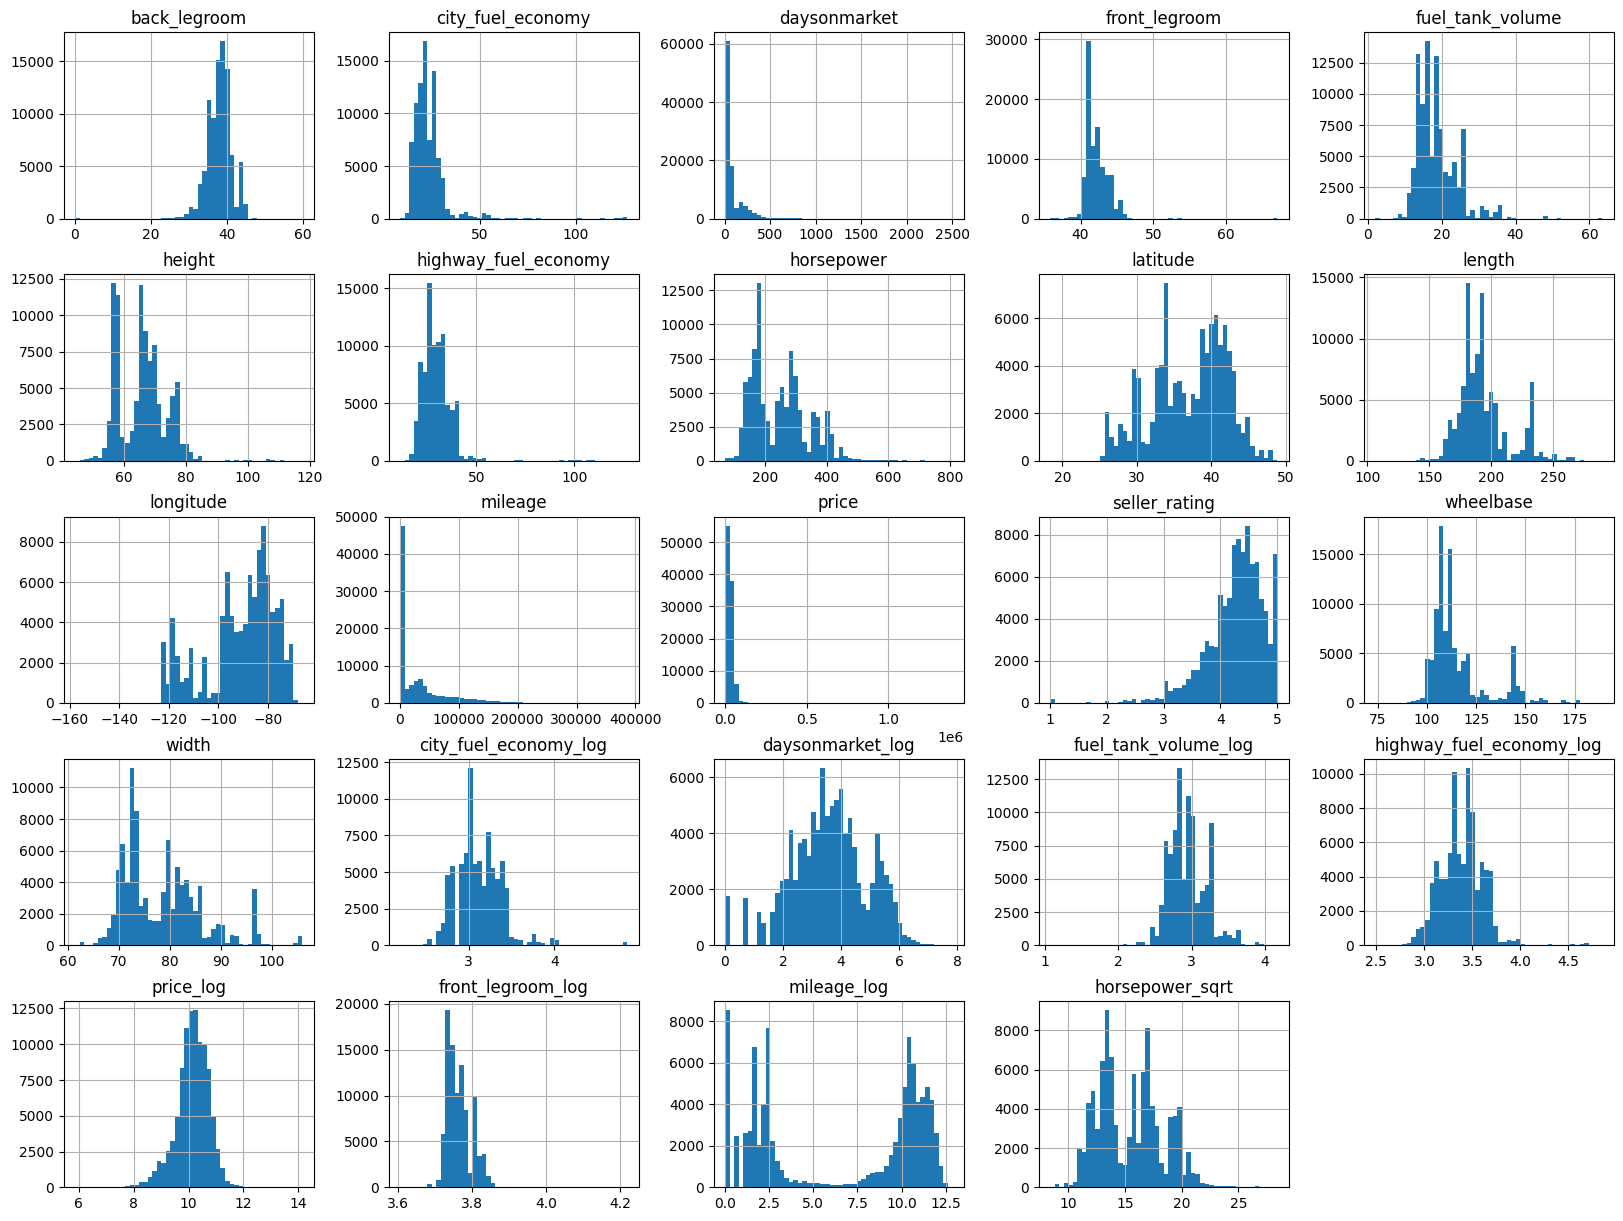

In [23]:
# Get all columns from process_data
all_columns = process_data.columns

# Filter out the categorical columns
filtered_columns = [col for col in all_columns if col not in categorical_feat_names]

# Create histograms for each feature with 50 bins and a figure size of 20x15 inches.
process_data[filtered_columns].hist(bins=50, figsize=(20, 15))

# Uncomment to save the histogram as a PNG file with 300 dpi resolution.
# plt.savefig('Figures/hist_log_import_data.png', format='png', dpi=300)

# Show the histogram plots.
plt.show()

In [24]:
# Drop the transformed columns
columns_to_remove = [ 'city_fuel_economy_log', 'daysonmarket_log', 'fuel_tank_volume_log', 'highway_fuel_economy_log', 'price_log', 'front_legroom_log', 'mileage_log', 'horsepower_sqrt']

# Remove the columns from process_data
process_data = process_data.drop(columns=columns_to_remove)

# Drop the boolean feature column as it's now integrated into 'savings_amount'
process_data = process_data.drop(columns=['savings_amount_bool'])

### 3.3.2 Manual Outlier Removal Process

- In this project, we addressed outliers by setting thresholds to remove data points that significantly deviate from the norm. The process was carried out in several steps and ways:

- **STEP 1. Threshold Identification and Range Definition:**
    - We applied the IQR method to determine the initial thresholds for outlier detection. These thresholds were adjusted based on observations from data exploration and visual insights from [box plots](#232-bot-plotting). After multiple iterations and refinements, we finalized the lower and upper bounds for each feature, ensuring that outliers were effectively captured without impacting valid data.

- **STEP 2. Manual and Automated Cleaning:**
    - In addition to using automated methods like the IQR to identify outliers, we manually inspected cases where automated processes missed outliers. These missed outliers were identified through deeper data exploration. After reviewing extreme values in context, we adjusted thresholds and removed manually identified outliers based on clear patterns in the data. This combined approach allowed us to handle both statistical and context-specific outliers effectively.

- **STEP 3. Iterative Outlier Removal and Data Integrity:**
    - To ensure the integrity of the original dataset, we created a copy of the dataframe before applying the outlier removal function. This function iterated through each feature, checking data points against the predefined thresholds. Data points outside the acceptable range were removed. Additionally, we tracked the removed rows to monitor data reduction and ensure that the final dataset remained representative. Manual review was applied to borderline cases, allowing us to retain or remove data based on thorough evaluation.

In [25]:
# Function to clean data by removing outliers based on specified thresholds
def manualCleaned(df, thresholds):
    processed_data = df.copy()

    for feature, thres in thresholds.items():
        if feature in processed_data.columns:
            initial_rows = processed_data.shape[0]  # Record initial row count
            lower_thres, upper_thres = thres
            mask = (processed_data[feature] >= lower_thres) & (processed_data[feature] <= upper_thres)
            processed_data = processed_data[mask]
            final_rows = processed_data.shape[0]  # Record final row count

            # Print the impact of filtering on the number of rows
            row_loss = initial_rows - final_rows
            percentage_loss = (row_loss / initial_rows) * 100
            print(f"Filtering '{feature}': {initial_rows} -> {final_rows} rows remaining ({row_loss} rows removed, {percentage_loss:.2f}% loss).")
    
    return processed_data

# Define thresholds for each feature to filter out outliers
thresholds = {
    'back_legroom': (35, 44),
    'city_fuel_economy': (10, 30),
    'daysonmarket': (0, 292),
    'front_legroom': (38, 45),
    'fuel_tank_volume': (10, 25),
    'height': (60, 80),
    'highway_fuel_economy': (10, 40),
    'horsepower': (0, 450),
    'length': (160, 210),
    'longitude': (-119, -60),
    'mileage': (0, 60000),
    'price': (0, 80000),
    'seller_rating': (3.1, 5),
    'wheelbase': (85, 130),
    'width': (70, 90)
}

# Apply the outlier removal process to the entire dataset (not just numeric features)
processed_data = manualCleaned(process_data, thresholds)

Filtering 'back_legroom': 100000 -> 78131 rows remaining (21869 rows removed, 21.87% loss).
Filtering 'city_fuel_economy': 78131 -> 66390 rows remaining (11741 rows removed, 15.03% loss).
Filtering 'daysonmarket': 66390 -> 63078 rows remaining (3312 rows removed, 4.99% loss).
Filtering 'front_legroom': 63078 -> 61084 rows remaining (1994 rows removed, 3.16% loss).
Filtering 'fuel_tank_volume': 61084 -> 56658 rows remaining (4426 rows removed, 7.25% loss).
Filtering 'height': 56658 -> 40967 rows remaining (15691 rows removed, 27.69% loss).
Filtering 'highway_fuel_economy': 40967 -> 40967 rows remaining (0 rows removed, 0.00% loss).
Filtering 'horsepower': 40967 -> 40616 rows remaining (351 rows removed, 0.86% loss).
Filtering 'length': 40616 -> 37401 rows remaining (3215 rows removed, 7.92% loss).
Filtering 'longitude': 37401 -> 36098 rows remaining (1303 rows removed, 3.48% loss).
Filtering 'mileage': 36098 -> 28773 rows remaining (7325 rows removed, 20.29% loss).
Filtering 'price': 28

## 3.4 Split the data set

In [26]:
# Split the dataset into main and testing datasets (80% train, 20% test)
train_set, test_set = train_test_split(processed_data, test_size=0.2, random_state=42, shuffle=True)

print('__Training and Testing datasets__')
print(f'{len(train_set)} training examples')  # Print the number of examples in the training set
print(f'{len(test_set)} test examples')        # Print the number of examples in the test set

__Training and Testing datasets__
19731 training examples
4933 test examples


## 3.5 Separate Labels From Data

In [27]:
train_set_labels = train_set["price"].copy()
train_set = train_set.drop(columns = "price")
test_set_labels = test_set["price"].copy()
test_set = test_set.drop(columns = "price")

## 3.6 Define Pipelines For Processing Data
### 3.6.1 Define Transformer For Column Selection

In [28]:
# Update column list after removing 'price' column
numeric_feat_names = [col for col in numeric_feat_names if col != 'price']
categorial_feat_names = [col for col in categorical_feat_names if col != 'price']

In [29]:
# Transformer to select specific columns from a dataframe
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_names):
        # Initialize with the list of feature (column) names to be selected
        self.feature_names = feature_names
    
    def fit(self, dataframe, labels=None):
        # fit method doesn't need to do anything for this transformer
        return self
    
    def transform(self, dataframe):
        # Select the columns specified in feature_names and return their values as a numpy array
        return dataframe[self.feature_names].values  
    
class MyFeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_power_to_displacement=True, add_mileage_per_day=True, add_average_fuel_economy=True):
        self.add_power_to_displacement = add_power_to_displacement
        self.add_mileage_per_day = add_mileage_per_day
        self.add_average_fuel_economy = add_average_fuel_economy

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        
        # Add power to engine displacement ratio feature
        if self.add_power_to_displacement:
            horsepower_id, engine_displacement_id = 4, 2  # Adjust these indices as per your data
            if horsepower_id < X.shape[1] and engine_displacement_id < X.shape[1]:
                power_to_displacement_ratio = X[:, horsepower_id] / X[:, engine_displacement_id]
                X = np.c_[X, power_to_displacement_ratio]
            else:
                raise IndexError(f"Invalid column index for power-to-displacement: {horsepower_id} or {engine_displacement_id}")

        # Add mileage per day on the market feature
        if self.add_mileage_per_day:
            mileage_id, daysonmarket_id = 7, 1  # Adjust these indices as per your data
            if mileage_id < X.shape[1] and daysonmarket_id < X.shape[1]:
                mileage_per_day = X[:, mileage_id] / (X[:, daysonmarket_id] + 1)
                X = np.c_[X, mileage_per_day]
            else:
                raise IndexError(f"Invalid column index for mileage per day: {mileage_id} or {daysonmarket_id}")

        # Add average fuel economy feature
        if self.add_average_fuel_economy:
            city_fuel_economy_id, highway_fuel_economy_id = 0, 3  # Adjust these indices as per your data
            if city_fuel_economy_id < X.shape[1] and highway_fuel_economy_id < X.shape[1]:
                average_fuel_economy = (X[:, city_fuel_economy_id] + X[:, highway_fuel_economy_id]) / 2
                X = np.c_[X, average_fuel_economy]
            else:
                raise IndexError(f"Invalid column index for fuel economy: {city_fuel_economy_id} or {highway_fuel_economy_id}")

        return X


### 3.6.2 Pipeline For Categorical and Numerical Features 
Pipeline is a streamline series of steps to process data and automate it for later use in model training. It includes automating and standardizing model development. 

The process of pipelining the dataset will be explained below, with each step clarified. 


- We first define a custom transformer, namely *ColumnSelector*, to extract features from the dataset and divide them into 2 main categories: categorical and numerical. 
- The process of *feature engineering* comes next, we add another custom transformer (*MyFeatureAdder*). Its purpose is to add new custom features into the dataset, based on the existing attributes. Those new features helps to evaluate the predictiveness of the dataset.<br>
- Now, two main steps branch from the process, which are *Categorical Pipeline* and *numerical Pipeline*.
  - Categorical Pipeline 
    - Processed using a scikit-learn pipeline. 
    1. *ColumnSelector* picks out categorical features. 
    2. *SimpleImputer* fills in missing values with "NO INFO". 
    3. *OneHotEncoder* encodes categorical columns into one-hot format. 
  - Numerical Pipeline 
    - Processed using another scikit-learn pipeline. 
    1. *ColumnSelector* picks out numerical columns. 
    2. *SimpleImputer* fills in missing values with median value of the column. 
    3. *MyFeatureAdder* adds in extra features using correlation analysis based on car attributes. 
    4. *StandardScaler* scales them to have a mean 0 value and further adds unit variance to normalize them. 
  - Further details about *OneHotEncoder*
    - *OneHotEncoder* converts categorical variables into numerical ones, in the form of binary. Each column will be transformed to a new binary column.<br>
    - Steps of the process
      - With the input of categorical data, it identifies all unique labels in one column. <br>
      - Then, for each unique label in a feature, it creates a new binary column for it.<br>
      - In the binary column in which the unique value is based on, the value will be 1. For other columns, it will be 0.

In [30]:
# Categorical pipeline for processing categorical features
categorical_pipeline = Pipeline([
    ('selector', ColumnSelector(categorial_feat_names)), # Selects only the categorical columns specified
    ('imputer', SimpleImputer(missing_values=np.nan, strategy="constant", fill_value="NO INFO", copy=True)),
    # Impute missing values in the categorical columns by filling with "NO INFO"
    ('cat_encoder', OneHotEncoder(sparse_output=True, handle_unknown='ignore'))  
    # One-hot encode the categorical data, outputting a sparse matrix to save memory
    # 'handle_unknown=ignore' ensures that unseen categories in the test data are ignored (won't throw errors)
])

# Pipeline for numerical features
numeric_pipeline = Pipeline([
    ('selector', ColumnSelector(numeric_feat_names)), # Select the numeric columns based on the provided feature names
    
    # Handle missing values by replacing them with the median of each column
    ('imputer', SimpleImputer(missing_values=np.nan, strategy="median", copy=True)),  # copy=False: imputation will be done in-place 
    
    # Add custom features using MyFeatureAdder (based on car attributes)
    ('attribs_adder', MyFeatureAdder(add_power_to_displacement=True, add_mileage_per_day=True, add_average_fuel_economy=True)),
    
    # Standardize features by removing the mean and scaling to unit variance
    ('std_scaler', StandardScaler(with_mean=True, with_std=True, copy=True))  # Scale features to zero mean and unit variance
])

### 3.6.3 Combine features transformed by two above pipelines

In [31]:
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", numeric_pipeline),
    ("cat_pipeline", categorical_pipeline) ])

## 3.7 Run the pipeline to process training data   

In [32]:
# Convert categorical columns to strings
def preprocess_categorical(df, categorical_features):
    for col in categorical_features:
        if df[col].dtype == 'bool':
            df[col] = df[col].astype(int).astype(str)  # Convert booleans to strings
        else:
            df[col] = df[col].astype(str)  # Ensure all categorical data is of string type
    return df
# Assume train_set is your DataFrame
train_set = preprocess_categorical(train_set, categorial_feat_names)

# Fit the full pipeline on the training dataset and transform the data
processed_train_set_val = full_pipeline.fit_transform(train_set)

# In thử dữ liệu đã được xử lý
print('\n____________ Processed feature values ____________')
print(processed_train_set_val[:3, :])  # Hiển thị 3 hàng đầu tiên
print(processed_train_set_val.shape)


# Print the shape of the processed data to check the number of rows and columns
print(processed_train_set_val.shape)

# Print number of numeric features, added features and columns for the one-hot vectors from the categorical data
# Calculate the actual number of one-hot encoded columns
num_numeric_features = len(numeric_feat_names)
num_added_features = 3
num_onehot_columns = processed_train_set_val.shape[1] - num_numeric_features - num_added_features

print(f'We have {num_numeric_features} numeric features + {num_added_features} added features + {num_onehot_columns} columns for one-hot encoded categorical features.')

# Save the full pipeline to a file so it can be reused later for predictions or further training
# joblib.dump(full_pipeline, r'Models/full_pipeline.pkl')


____________ Processed feature values ____________
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 165 stored elements and shape (3, 17593)>
  Coords	Values
  (0, 0)	-0.7083294971263178
  (0, 1)	-0.190246888645416
  (0, 2)	-0.03171549718582224
  (0, 3)	0.5717573748530984
  (0, 4)	1.1419862741554927
  (0, 5)	-0.36376118248918315
  (0, 6)	1.2826105025199213
  (0, 7)	1.984394269546172
  (0, 8)	1.1709647591430572
  (0, 9)	1.3478444291782912
  (0, 10)	1.6771877575814043
  (0, 11)	0.2560466279416275
  (0, 12)	-1.4647613625637228
  (0, 13)	-0.8296740282908367
  (0, 14)	-0.10341254223120987
  (0, 15)	0.7185413260388254
  (0, 16)	0.7095221404863205
  (0, 17)	-0.708212207867466
  (0, 748)	1.0
  (0, 6234)	1.0
  (0, 6288)	1.0
  (0, 6391)	1.0
  (0, 6409)	1.0
  (0, 6413)	1.0
  (0, 6416)	1.0
  :	:
  (2, 6471)	1.0
  (2, 6472)	1.0
  (2, 6474)	1.0
  (2, 6476)	1.0
  (2, 6479)	1.0
  (2, 6482)	1.0
  (2, 6487)	1.0
  (2, 6507)	1.0
  (2, 6527)	1.0
  (2, 6671)	1.0
  (2, 6898)	1.0
  (2, 7512)	1.0

In [33]:
# Extract the list of one-hot encoded columns from the encoder
onehot_cols = []
for val_list in full_pipeline.transformer_list[1][1].named_steps['cat_encoder'].categories_: 
    onehot_cols += val_list.tolist()

# Create a list of column names for the DataFrame
# Add original column names from the training set and the new one-hot encoded columns
columns_header = train_set.columns.tolist() + onehot_cols

# Check the number of columns in the processed data
num_columns_data = processed_train_set_val.shape[1]
# Check the number of column names in the columns_header list
num_columns_header = len(columns_header)

# Compare and adjust if necessary
if num_columns_data != num_columns_header:
    # Adjust columns_header to match the number of columns in the processed data
    columns_header = columns_header[:num_columns_data]

# Create a DataFrame from the processed data using the column names
processed_train_set = pd.DataFrame(processed_train_set_val.toarray(), columns=columns_header)

# Print information about the DataFrame to check its structure
print('\n____________ Processed dataframe ____________')
print(processed_train_set.info())
print(processed_train_set.head())

# Replace invalid characters (e.g., spaces) in column names with underscores
processed_train_set.columns = processed_train_set.columns.str.replace(' ', '_').str.replace('[^\w]', '_', regex=True)


____________ Processed dataframe ____________


<>:29: SyntaxWarning: invalid escape sequence '\w'
<>:29: SyntaxWarning: invalid escape sequence '\w'
C:\Users\conhe\AppData\Local\Temp\ipykernel_15088\90201025.py:29: SyntaxWarning: invalid escape sequence '\w'
  processed_train_set.columns = processed_train_set.columns.str.replace(' ', '_').str.replace('[^\w]', '_', regex=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19731 entries, 0 to 19730
Columns: 17593 entries, back_legroom to XLE AWD
dtypes: float64(17593)
memory usage: 2.6 GB
None
   back_legroom       bed  bed_length  body_type     cabin      city  \
0     -0.708329 -0.190247   -0.031715   0.571757  1.141986 -0.363761   
1      1.748919  0.392273    0.275641  -0.724483 -0.757006 -0.477048   
2      0.562043 -0.772767   -0.953786  -0.591535  0.889908 -0.802748   
3     -0.708035 -0.481507   -0.339072   0.571757  1.141986 -0.023901   
4      2.524681 -0.190247   -0.031715   0.505284  0.469777  1.746206   

   city_fuel_economy  daysonmarket  dealer_zip  engine_cylinders  ...  \
0           1.282611      1.984394    1.170965          1.347844  ...   
1          -0.686034     -1.011344   -0.481138         -0.559618  ...   
2          -0.676041      1.057142   -0.698520          1.157098  ...   
3           1.282611      1.984394    1.170965          1.347844  ...   
4           0.643051     -0.4

# 4. MODEL TRAINING AND EVALUATION
## 4.0 Library Imports, Performance Metric and Save Model Function

In [34]:
# Importing various regression models from scikit-learn
from sklearn.linear_model import LinearRegression  # Standard linear regression model
from sklearn.linear_model import ElasticNet        # Linear regression with both L1 (Lasso) and L2 (Ridge) regularization
from sklearn.linear_model import Ridge            # Linear regression with L2 regularization
from sklearn.linear_model import Lasso            # Linear regression with L1 regularization
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz    # Decision tree model for regression tasks
from sklearn.ensemble import RandomForestRegressor  # Random forest model for regression tasks
from sklearn.metrics import mean_squared_error    # Function to compute the mean squared error (MSE)
from sklearn.metrics import r2_score              # Function to compute the R-squared score
from sklearn.ensemble import AdaBoostRegressor    # AdaBoost regressor
from sklearn.ensemble import GradientBoostingRegressor  # Gradient boosting regressor

In [35]:
def r2_score_and_rmse(model, train_data, labels): 
    r2score = model.score(train_data, labels) # Calculate the R-squared score for the model on the training data
    prediction = model.predict(train_data) # Generate predictions using the trained model on the training data
    mse = mean_squared_error(labels, prediction) # Calculate the Mean Squared Error (MSE) between the actual and predicted labels
    rmse = np.sqrt(mse) # Compute the Root Mean Square Error (RMSE) from the MSE
    return r2score, rmse # Return the R-squared score and RMSE

In [36]:
def store_model(model, model_name=""):
    # NOTE: joblib is faster than Python's pickle for saving models
    # INFO: Each file can only store one object
    if model_name == "":
        # Use the model's class name if no name is provided
        model_name = type(model).__name__
    joblib.dump(model, 'Models/' + model_name + '_model.pkl')

def load_model(model_name):
    # Load the model from a file
    model = joblib.load('Models/' + model_name + '_model.pkl')
    return model

- In this session, the training for 8 models will be executed. After that, it is necessary to evaluate the model’s performance using various regression metrics and visualize the results.

- Performance Metrics:
    + R-squared (R²): Indicates how much variance in the car price the model explains.
    + Mean Squared Error (MSE) / Root Mean Squared Error (RMSE): Measures the model's average error.
    + Mean Absolute Error (MAE): Provides insight into the average deviation between actual and predicted prices.
    
- Visualization:
    + Residual Plots: Compare predicted vs. actual prices to identify patterns.
    + Learning Curves: Evaluate how the model performs on training vs. validation data to detect overfitting or underfitting.

## 4.1 LinearRegression Model
### 4.1.1 Training Process

In [37]:
model = LinearRegression() # Create a LinearRegression model
model.fit(processed_train_set_val, train_set_labels) # Train the model on the training data

# Print the learned parameters of the model
print('\n____________ LinearRegression ____________')
print('Learned parameters: ', model.coef_, model.intercept_)


____________ LinearRegression ____________
Learned parameters:  [ -638.09228438 -1349.14565116    38.41271929 ...  -203.10228821
  -410.63890621    16.96663884] 29434.81511420578


### 4.1.2 Evaluate Model: R² Score & RMSE

In [38]:
# Call the function with the model, training data, and labels, and get R2 score and RMSE
r2score, rmse = r2_score_and_rmse(model, processed_train_set_val, train_set_labels)

# Print the R-squared score and RMSE
print('\nR2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))


R2 score (on training data, best=1): 0.9898036612831845
Root Mean Square Error:  1110.1


### 4.1.3 Visualization

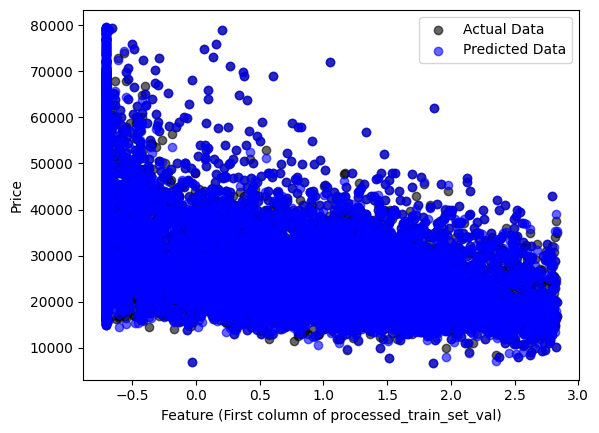

In [39]:
# Predict the prices
predictions = model.predict(processed_train_set_val)

# Select the first column to visualize
x = processed_train_set_val[:, 0].toarray().flatten()  # Convert CSR matrix to 1D array

# Plot scatter of the actual data
plt.scatter(x, train_set_labels, color='black', alpha=0.6, label="Actual Data")

# Plot scatter of predictions instead of connecting them with lines
plt.scatter(x, predictions, color='blue', alpha=0.6, label="Predicted Data")

# Adding labels and legend
plt.xlabel('Feature (First column of processed_train_set_val)')
plt.ylabel('Price')
plt.legend()
plt.show()

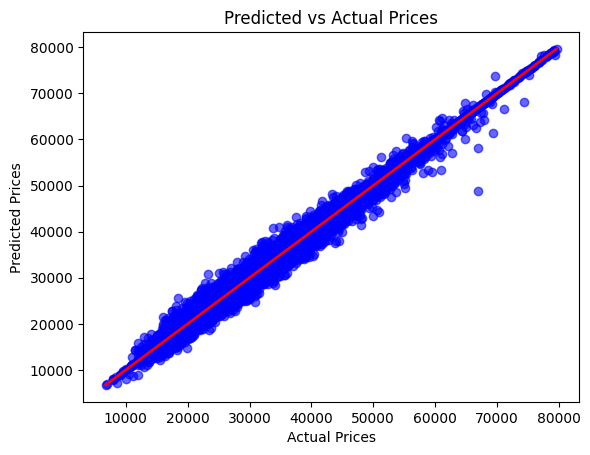

In [40]:
# Plot predicted prices vs actual prices
plt.scatter(train_set_labels, predictions, color='blue', alpha=0.6)
plt.plot([min(train_set_labels), max(train_set_labels)], [min(train_set_labels), max(train_set_labels)], color='red', lw=2)  # Line y=x
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.show()


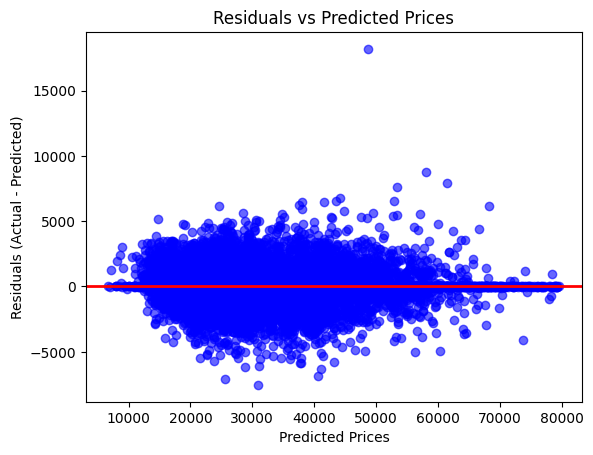

In [41]:
# Calculate residuals
residuals = train_set_labels - predictions

# Plot residuals
plt.scatter(predictions, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', lw=2)  # Zero error line
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs Predicted Prices')
plt.show()


### 4.1.4 Predict on Training Data

In [42]:
print("\nInput data: \n", train_set.iloc[0:9]) # Print the first 9 rows of the input training data

# Print the predictions of the model for the first 9 samples, rounded to 1 decimal place
print("\nPredictions: ", model.predict(processed_train_set_val[0:9]).round(decimals=1))

print("Labels:      ", list(train_set_labels[0:9])) # Print the true labels for the first 9 samples


Input data: 
        back_legroom  bed bed_length        body_type cabin               city  \
94778          39.0  NaN        nan  SUV / Crossover   nan             Boerne   
93624          39.6  NaN        nan  SUV / Crossover   nan        Leavenworth   
5402           36.8  NaN        nan  SUV / Crossover   nan            Du Bois   
10017          39.0  NaN        nan  SUV / Crossover   nan              Utica   
83317          38.7  NaN        nan  SUV / Crossover   nan             Lufkin   
96601          40.7  NaN        nan  SUV / Crossover   nan  Arlington Heights   
97727          39.6  NaN        nan  SUV / Crossover   nan       Libertyville   
90690          38.7  NaN        nan  SUV / Crossover   nan        Marlborough   
75911          38.6  NaN        nan  SUV / Crossover   nan            La Mesa   

       city_fuel_economy  daysonmarket dealer_zip engine_cylinders  ...  \
94778               21.0            38      78006               I4  ...   
93624               23.0

### 4.1.5 Save Models for Comparison

In [43]:
# Save the specified model to a file using the store_model function
# Uncomment the following line to save the model to a file
# store_model(model)

## 4.2 RidgeRegression Model
### 4.2.1 Training Process

In [116]:
model = Ridge() # Create a RidgeRegression model
model.fit(processed_train_set_val, train_set_labels) # Train the model on the training data

# Print the learned parameters of the model
print('\n____________ RidgeRegression ____________')
print('Learned parameters: ', model.coef_, model.intercept_)


____________ RidgeRegression ____________
Learned parameters:  [ -758.16725628 -2496.08008147  1407.45586713 ...  -389.12286282
  -819.43537212    10.97025828] 21963.372288979743


### 4.2.2 Evaluate Model: R² Score & RMSE

In [117]:
# Call the function with the model, training data, and labels, and get R2 score and RMSE
r2score, rmse = r2_score_and_rmse(model, processed_train_set_val, train_set_labels)

# Print the R-squared score and RMSE
print('\nR2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))


R2 score (on training data, best=1): 0.9820012936638806
Root Mean Square Error:  1474.9


### 4.2.3 Visualization

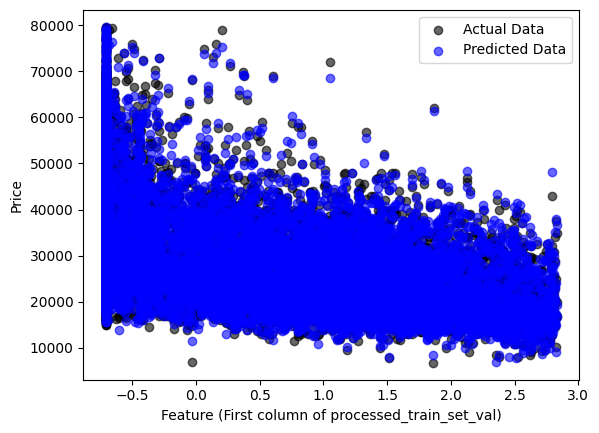

In [118]:
# Predict the prices
predictions = model.predict(processed_train_set_val)

# Select the first column to visualize
x = processed_train_set_val[:, 0].toarray().flatten()  # Convert CSR matrix to 1D array

# Plot scatter of the actual data
plt.scatter(x, train_set_labels, color='black', alpha=0.6, label="Actual Data")

# Plot scatter of predictions instead of connecting them with lines
plt.scatter(x, predictions, color='blue', alpha=0.6, label="Predicted Data")

# Adding labels and legend
plt.xlabel('Feature (First column of processed_train_set_val)')
plt.ylabel('Price')
plt.legend()
plt.show()

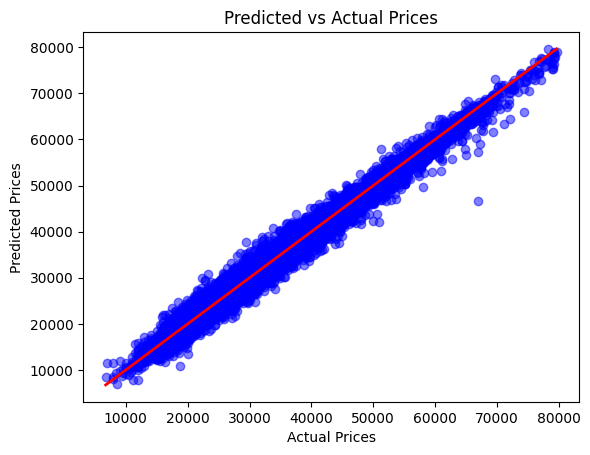

In [119]:
# Plot predicted prices vs actual prices
plt.scatter(train_set_labels, predictions, color='blue', alpha=0.5)
plt.plot([min(train_set_labels), max(train_set_labels)], [min(train_set_labels), max(train_set_labels)], color='red', lw=2)  # Line y=x
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.show()

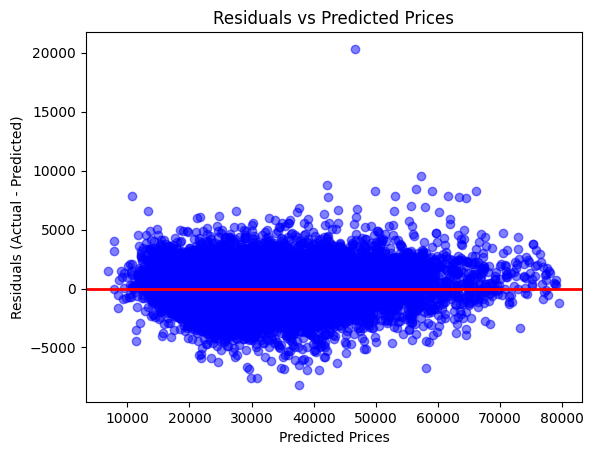

In [120]:
# Calculate residuals
residuals = train_set_labels - predictions

# Plot residuals
plt.scatter(predictions, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', lw=2)  # Zero error line
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs Predicted Prices')
plt.show()


### 4.2.4 Predict on Training Data

In [121]:
print("\nInput data: \n", train_set.iloc[0:9]) # Print the first 9 rows of the input training data

# Print the predictions of the model for the first 9 samples, rounded to 1 decimal place
print("\nPredictions: ", model.predict(processed_train_set_val[0:9]).round(decimals=1))

print("Labels:      ", list(train_set_labels[0:9])) # Print the true labels for the first 9 samples


Input data: 
        back_legroom  bed bed_length        body_type cabin               city  \
94778          39.0  NaN        nan  SUV / Crossover   nan             Boerne   
93624          39.6  NaN        nan  SUV / Crossover   nan        Leavenworth   
5402           36.8  NaN        nan  SUV / Crossover   nan            Du Bois   
10017          39.0  NaN        nan  SUV / Crossover   nan              Utica   
83317          38.7  NaN        nan  SUV / Crossover   nan             Lufkin   
96601          40.7  NaN        nan  SUV / Crossover   nan  Arlington Heights   
97727          39.6  NaN        nan  SUV / Crossover   nan       Libertyville   
90690          38.7  NaN        nan  SUV / Crossover   nan        Marlborough   
75911          38.6  NaN        nan  SUV / Crossover   nan            La Mesa   

       city_fuel_economy  daysonmarket dealer_zip engine_cylinders  ...  \
94778               21.0            38      78006               I4  ...   
93624               23.0

### 4.2.5 Save Models for Comparison

In [123]:
# Save the specified model to a file using the store_model function
# Uncomment the following line to save the model to a file
# store_model(model)

## 4.3 LassoRegression Model
### 4.3.1 Training Process

In [66]:
model = Lasso(alpha=0.5, max_iter=20000) # Create a LassoRegression model
model.fit(processed_train_set_val, train_set_labels) # Train the model on the training data

Lasso(alpha=0.5, max_iter=20000)

### 4.3.2 Evaluate Model: R² Score & RMSE

In [67]:
# Call the function with the model, training data, and labels, and get R2 score and RMSE
r2score, rmse = r2_score_and_rmse(model, processed_train_set_val, train_set_labels)

# Print the R-squared score and RMSE
print('\nR2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))


R2 score (on training data, best=1): 0.9536362502883434
Root Mean Square Error:  2367.2


### 4.3.3 Visualization

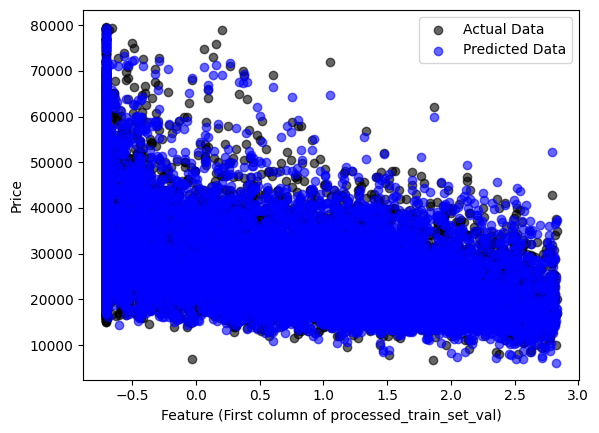

In [68]:
# Predict the prices
predictions = model.predict(processed_train_set_val)

# Select the first column to visualize
x = processed_train_set_val[:, 0].toarray().flatten()  # Convert CSR matrix to 1D array

# Plot scatter of the actual data
plt.scatter(x, train_set_labels, color='black', alpha=0.6, label="Actual Data")

# Plot scatter of predictions instead of connecting them with lines
plt.scatter(x, predictions, color='blue', alpha=0.6, label="Predicted Data")

# Adding labels and legend
plt.xlabel('Feature (First column of processed_train_set_val)')
plt.ylabel('Price')
plt.legend()
plt.show()

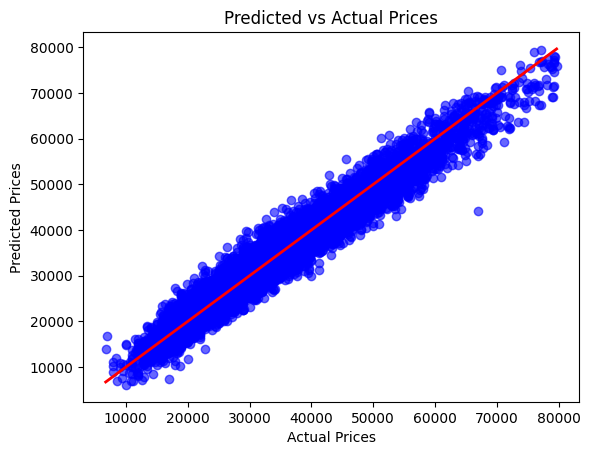

In [69]:
# Plot predicted prices vs actual prices
plt.scatter(train_set_labels, predictions, color='blue', alpha=0.6)
plt.plot([min(train_set_labels), max(train_set_labels)], [min(train_set_labels), max(train_set_labels)], color='red', lw=2)  # Line y=x
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.show()

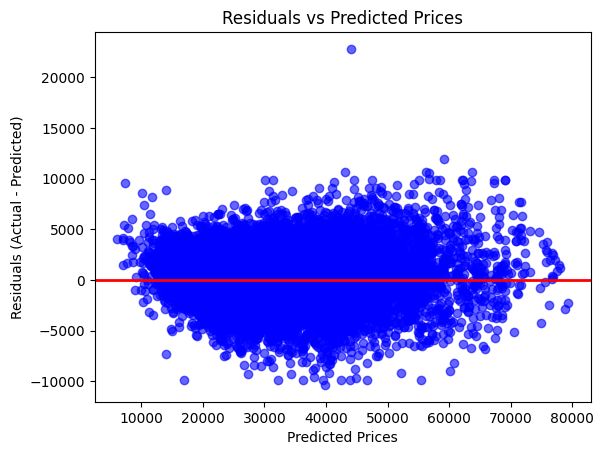

In [70]:
# Calculate residuals
residuals = train_set_labels - predictions

# Plot residuals
plt.scatter(predictions, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', lw=2)  # Zero error line
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs Predicted Prices')
plt.show()

### 4.3.4 Predict on Training Data

In [71]:
print("\nInput data: \n", train_set.iloc[0:9]) # Print the first 9 rows of the input training data

# Print the predictions of the model for the first 9 samples, rounded to 1 decimal place
print("\nPredictions: ", model.predict(processed_train_set_val[0:9]).round(decimals=1))

print("Labels:      ", list(train_set_labels[0:9])) # Print the true labels for the first 9 samples


Input data: 
        back_legroom  bed bed_length        body_type cabin               city  \
94778          39.0  NaN        nan  SUV / Crossover   nan             Boerne   
93624          39.6  NaN        nan  SUV / Crossover   nan        Leavenworth   
5402           36.8  NaN        nan  SUV / Crossover   nan            Du Bois   
10017          39.0  NaN        nan  SUV / Crossover   nan              Utica   
83317          38.7  NaN        nan  SUV / Crossover   nan             Lufkin   
96601          40.7  NaN        nan  SUV / Crossover   nan  Arlington Heights   
97727          39.6  NaN        nan  SUV / Crossover   nan       Libertyville   
90690          38.7  NaN        nan  SUV / Crossover   nan        Marlborough   
75911          38.6  NaN        nan  SUV / Crossover   nan            La Mesa   

       city_fuel_economy  daysonmarket dealer_zip engine_cylinders  ...  \
94778               21.0            38      78006               I4  ...   
93624               23.0

### 4.3.5 Save Models for Comparison

In [72]:
# Save the specified model to a file using the store_model function
# Uncomment the following line to save the model to a file
store_model(model)

## 4.4 ElasticNet Model
### 4.4.1 Training Process

In [124]:
model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42) # Create a Elastic_Net model
model.fit(processed_train_set_val, train_set_labels) # Train the model on the training data

# Print the learned parameters of the model
print('\n____________ Elastic_Net ____________')
print('Learned parameters: ', model.coef_, model.intercept_)


____________ Elastic_Net ____________
Learned parameters:  [-1297.88390687   106.52829425  -234.70428192 ...  -864.84684519
    79.00166199    -5.22792886] 29644.822912622392


### 4.4.2 Evaluate Model: R² Score & RMSE

In [125]:
# Call the function with the model, training data, and labels, and get R2 score and RMSE
r2score, rmse = r2_score_and_rmse(model, processed_train_set_val, train_set_labels)

# Print the R-squared score and RMSE
print('\nR2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))


R2 score (on training data, best=1): 0.7053018802330833
Root Mean Square Error:  5968.1


### 4.4.3 Visualization

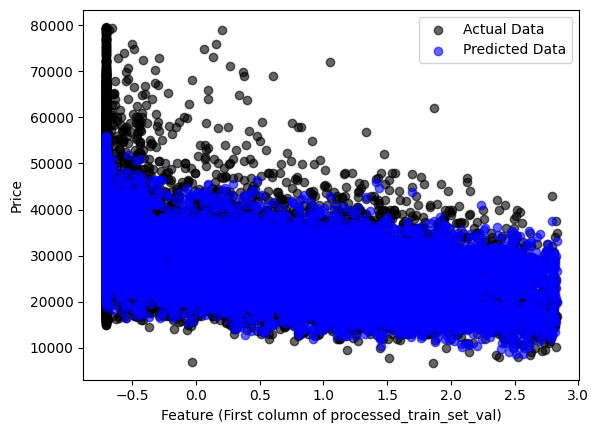

In [126]:
# Predict the prices
predictions = model.predict(processed_train_set_val)

# Select the first column to visualize
x = processed_train_set_val[:, 0].toarray().flatten()  # Convert CSR matrix to 1D array

# Plot scatter of the actual data
plt.scatter(x, train_set_labels, color='black', alpha=0.6, label="Actual Data")

# Plot scatter of predictions instead of connecting them with lines
plt.scatter(x, predictions, color='blue', alpha=0.6, label="Predicted Data")

# Adding labels and legend
plt.xlabel('Feature (First column of processed_train_set_val)')
plt.ylabel('Price')
plt.legend()
plt.show()

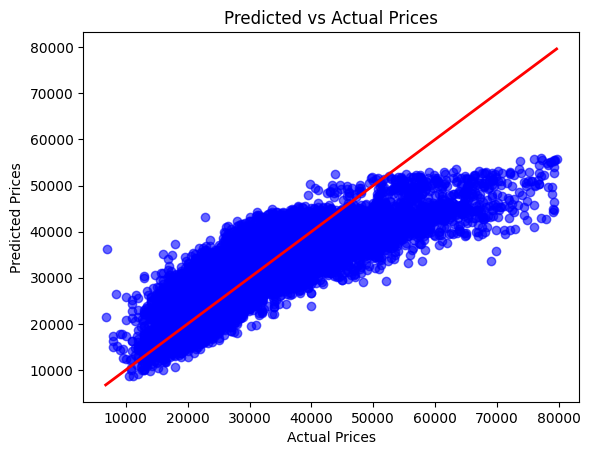

In [127]:
# Plot predicted prices vs actual prices
plt.scatter(train_set_labels, predictions, color='blue', alpha=0.6)
plt.plot([min(train_set_labels), max(train_set_labels)], [min(train_set_labels), max(train_set_labels)], color='red', lw=2)  # Line y=x
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.show()


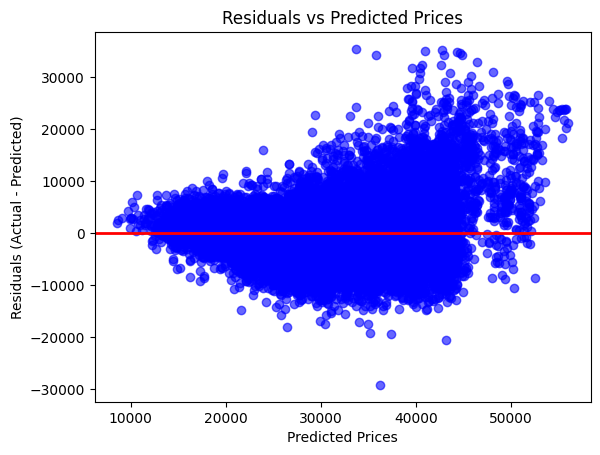

In [128]:
# Calculate residuals
residuals = train_set_labels - predictions

# Plot residuals
plt.scatter(predictions, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', lw=2)  # Zero error line
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs Predicted Prices')
plt.show()


### 4.4.4 Predict on Training Data

In [129]:
print("\nInput data: \n", train_set.iloc[0:9]) # Print the first 9 rows of the input training data

# Print the predictions of the model for the first 9 samples, rounded to 1 decimal place
print("\nPredictions: ", model.predict(processed_train_set_val[0:9]).round(decimals=1))

print("Labels:      ", list(train_set_labels[0:9])) # Print the true labels for the first 9 samples


Input data: 
        back_legroom  bed bed_length        body_type cabin               city  \
94778          39.0  NaN        nan  SUV / Crossover   nan             Boerne   
93624          39.6  NaN        nan  SUV / Crossover   nan        Leavenworth   
5402           36.8  NaN        nan  SUV / Crossover   nan            Du Bois   
10017          39.0  NaN        nan  SUV / Crossover   nan              Utica   
83317          38.7  NaN        nan  SUV / Crossover   nan             Lufkin   
96601          40.7  NaN        nan  SUV / Crossover   nan  Arlington Heights   
97727          39.6  NaN        nan  SUV / Crossover   nan       Libertyville   
90690          38.7  NaN        nan  SUV / Crossover   nan        Marlborough   
75911          38.6  NaN        nan  SUV / Crossover   nan            La Mesa   

       city_fuel_economy  daysonmarket dealer_zip engine_cylinders  ...  \
94778               21.0            38      78006               I4  ...   
93624               23.0

### 4.4.5 Save Models for Comparison

In [130]:
# Save the specified model to a file using the store_model function
# Uncomment the following line to save the model to a file
# store_model(model)

## 4.5 DecisionTreeRegressor Model
### 4.5.1 Training Process

In [58]:
model = DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=4, random_state=42) # Create a DecisionTreeRegressor model
clf = model.fit(processed_train_set_val, train_set_labels) # Train the model on the training data
clf

DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                      random_state=42)

### 4.5.2 Evaluate Model: R² Score & RMSE

In [59]:
# Call the function with the model, training data, and labels, and get R2 score and RMSE
r2score, rmse = r2_score_and_rmse(model, processed_train_set_val, train_set_labels)

# Print the R-squared score and RMSE
print('\n____________ DecisionTreeRegressor ____________')
print('\nR2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))


____________ DecisionTreeRegressor ____________

R2 score (on training data, best=1): 0.8892139113423099
Root Mean Square Error:  3659.3


### 4.5.3 Predict on Training Data

In [60]:
print("\nInput data: \n", train_set.iloc[0:9]) # Print the first 9 rows of the input training data

# Print the predictions of the model for the first 9 samples, rounded to 1 decimal place
print("\nPredictions: ", model.predict(processed_train_set_val[0:9]).round(decimals=1))

print("Labels:      ", list(train_set_labels[0:9])) # Print the true labels for the first 9 samples


Input data: 
        back_legroom  bed bed_length        body_type cabin               city  \
94778          39.0  NaN        nan  SUV / Crossover   nan             Boerne   
93624          39.6  NaN        nan  SUV / Crossover   nan        Leavenworth   
5402           36.8  NaN        nan  SUV / Crossover   nan            Du Bois   
10017          39.0  NaN        nan  SUV / Crossover   nan              Utica   
83317          38.7  NaN        nan  SUV / Crossover   nan             Lufkin   
96601          40.7  NaN        nan  SUV / Crossover   nan  Arlington Heights   
97727          39.6  NaN        nan  SUV / Crossover   nan       Libertyville   
90690          38.7  NaN        nan  SUV / Crossover   nan        Marlborough   
75911          38.6  NaN        nan  SUV / Crossover   nan            La Mesa   

       city_fuel_economy  daysonmarket dealer_zip engine_cylinders  ...  \
94778               21.0            38      78006               I4  ...   
93624               23.0

### 4.5.4 Visualization

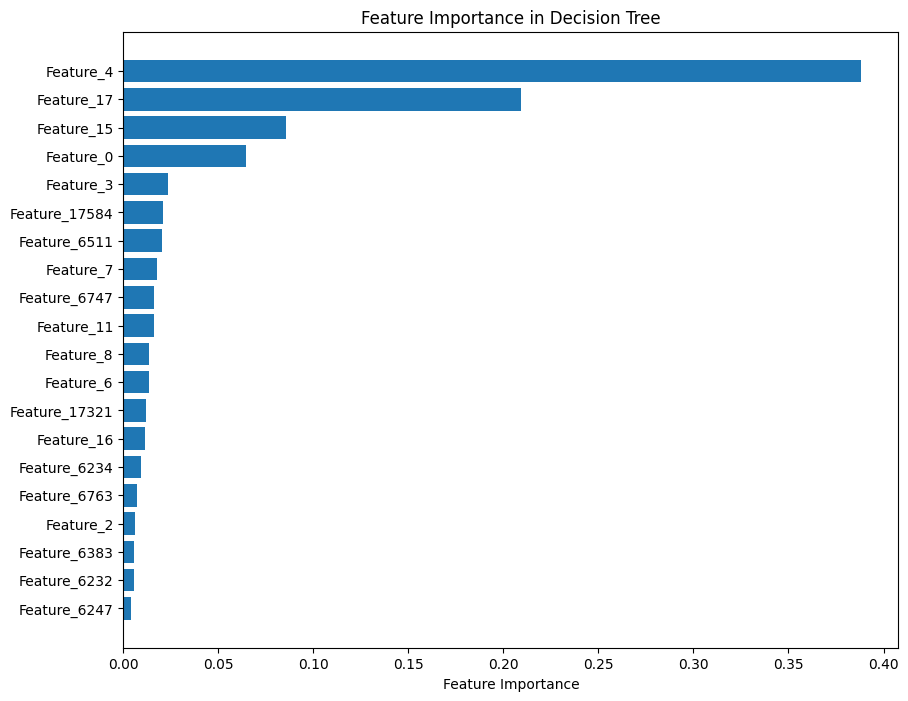

<Figure size 640x480 with 0 Axes>

In [64]:
# [1]. Visualize Important Features
# If processed_train_set_val is a sparse matrix, create feature names list
feature_names = np.array([f'Feature_{i}' for i in range(processed_train_set_val.shape[1])])

# Calculate the importance of features
feature_importances = model.feature_importances_

# Sort by importance
indices = np.argsort(feature_importances)[::-1]

# Select top features (e.g., top 20)
top_n = 20  # Adjust as needed
indices = indices[:top_n]
importances = feature_importances[indices]
feature_names = feature_names[indices]

# Plot
plt.figure(figsize=(10, 8))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(range(len(importances)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()  # Most important at the top
plt.show()

# Save the plot to the folder
plt.savefig('figures/feature_importance.png', bbox_inches='tight')
plt.show()

### 4.5.5 Save Models for Comparison

In [65]:
# Save the specified model to a file using the store_model function
# Uncomment the following line to save the model to a file
# store_model(model)

## 4.6 RandomForestRegressor Model
### 4.6.1 Training Process

In [74]:
model = RandomForestRegressor() # Create a RandomForestRegressor model
model.fit(processed_train_set_val, train_set_labels) # Train the model on the training data

RandomForestRegressor()

### 4.6.2 Evaluate Model: R² Score & RMSE

In [75]:
# Call the function with the model, training data, and labels, and get R2 score and RMSE
r2score, rmse = r2_score_and_rmse(model, processed_train_set_val, train_set_labels)

# Print the R-squared score and RMSE
print('\nR2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))


R2 score (on training data, best=1): 0.9914114623821917
Root Mean Square Error:  1018.8


### 4.6.3 Predict on Training Data

In [76]:
print("\nInput data: \n", train_set.iloc[0:9]) # Print the first 9 rows of the input training data

# Print the predictions of the model for the first 9 samples, rounded to 1 decimal place
print("\nPredictions: ", model.predict(processed_train_set_val[0:9]).round(decimals=1))

print("Labels:      ", list(train_set_labels[0:9])) # Print the true labels for the first 9 samples


Input data: 
        back_legroom  bed bed_length        body_type cabin               city  \
94778          39.0  NaN        nan  SUV / Crossover   nan             Boerne   
93624          39.6  NaN        nan  SUV / Crossover   nan        Leavenworth   
5402           36.8  NaN        nan  SUV / Crossover   nan            Du Bois   
10017          39.0  NaN        nan  SUV / Crossover   nan              Utica   
83317          38.7  NaN        nan  SUV / Crossover   nan             Lufkin   
96601          40.7  NaN        nan  SUV / Crossover   nan  Arlington Heights   
97727          39.6  NaN        nan  SUV / Crossover   nan       Libertyville   
90690          38.7  NaN        nan  SUV / Crossover   nan        Marlborough   
75911          38.6  NaN        nan  SUV / Crossover   nan            La Mesa   

       city_fuel_economy  daysonmarket dealer_zip engine_cylinders  ...  \
94778               21.0            38      78006               I4  ...   
93624               23.0

### 4.6.4 Save Models for Comparison

In [77]:
# Save the specified model to a file using the store_model function
# Uncomment the following line to save the model to a file

# store_model(model)

## 4.7 AdaBoostRegressor Model
### 4.7.1 Training Process

In [78]:
model = AdaBoostRegressor(n_estimators=300, learning_rate=0.05, random_state=42) # Create a LinearRegression model
model.fit(processed_train_set_val, train_set_labels) # Train the model on the training data

AdaBoostRegressor(learning_rate=0.05, n_estimators=300, random_state=42)

### 4.7.2 Evaluate Model: R² Score & RMSE

In [79]:
# Call the function with the model, training data, and labels, and get R2 score and RMSE
r2score, rmse = r2_score_and_rmse(model, processed_train_set_val, train_set_labels)

# Print the R-squared score and RMSE
print('\n____________ AdaBoostRegressor ____________')
print('\nR2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))


____________ AdaBoostRegressor ____________

R2 score (on training data, best=1): 0.7232397897370513
Root Mean Square Error:  5783.6


### 4.7.3 Visualization

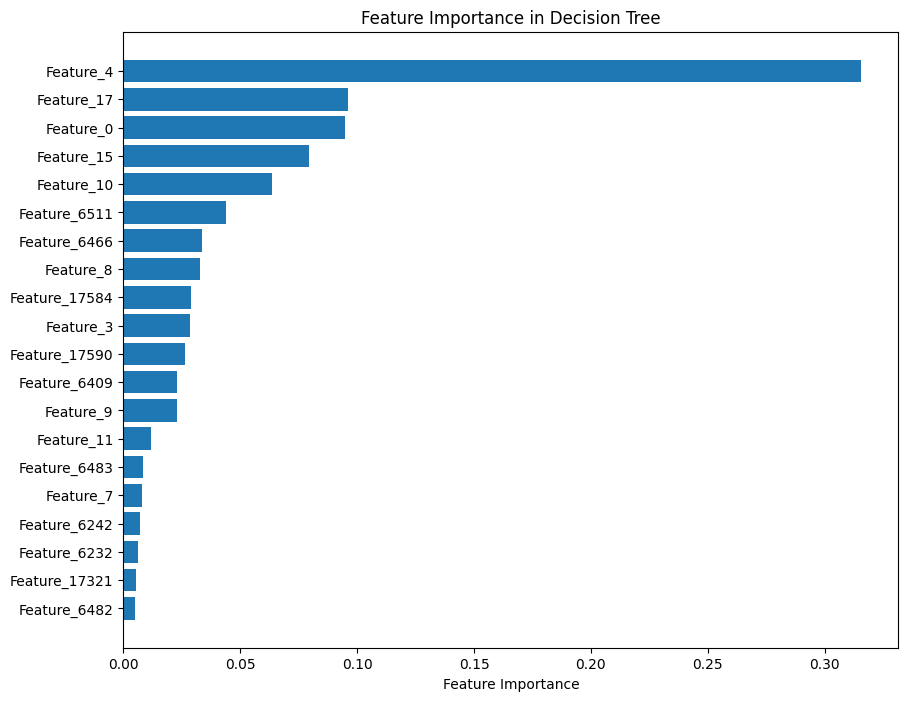

In [80]:
# [1]. Visualize Important Features
# If processed_train_set_val is a sparse matrix, create feature names list
feature_names = np.array([f'Feature_{i}' for i in range(processed_train_set_val.shape[1])])

# Calculate the importance of features
feature_importances = model.feature_importances_

# Sort by importance
indices = np.argsort(feature_importances)[::-1]

# Select top features (e.g., top 20)
top_n = 20  # Adjust as needed
indices = indices[:top_n]
importances = feature_importances[indices]
feature_names = feature_names[indices]

# Plot
plt.figure(figsize=(10, 8))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(range(len(importances)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()  # Most important at the top
plt.show()

# Save the plot to the folder
# plt.savefig('figures/feature_importance.png', bbox_inches='tight')
plt.show()

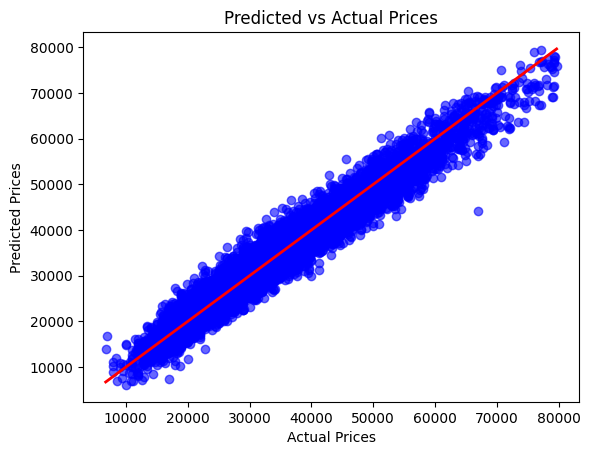

In [81]:
# Plot predicted prices vs actual prices
plt.scatter(train_set_labels, predictions, color='blue', alpha=0.6)
plt.plot([min(train_set_labels), max(train_set_labels)], [min(train_set_labels), max(train_set_labels)], color='red', lw=2)  # Line y=x
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.show()


### 4.7.4 Predict on Training Data

In [82]:
print("\nInput data: \n", train_set.iloc[0:9]) # Print the first 9 rows of the input training data

# Print the predictions of the model for the first 9 samples, rounded to 1 decimal place
print("\nPredictions: ", model.predict(processed_train_set_val[0:9]).round(decimals=1))

print("Labels:      ", list(train_set_labels[0:9])) # Print the true labels for the first 9 samples


Input data: 
        back_legroom  bed bed_length        body_type cabin               city  \
94778          39.0  NaN        nan  SUV / Crossover   nan             Boerne   
93624          39.6  NaN        nan  SUV / Crossover   nan        Leavenworth   
5402           36.8  NaN        nan  SUV / Crossover   nan            Du Bois   
10017          39.0  NaN        nan  SUV / Crossover   nan              Utica   
83317          38.7  NaN        nan  SUV / Crossover   nan             Lufkin   
96601          40.7  NaN        nan  SUV / Crossover   nan  Arlington Heights   
97727          39.6  NaN        nan  SUV / Crossover   nan       Libertyville   
90690          38.7  NaN        nan  SUV / Crossover   nan        Marlborough   
75911          38.6  NaN        nan  SUV / Crossover   nan            La Mesa   

       city_fuel_economy  daysonmarket dealer_zip engine_cylinders  ...  \
94778               21.0            38      78006               I4  ...   
93624               23.0

### 4.7.5 Save Models for Comparison

In [83]:
# Save the specified model to a file using the store_model function
# Uncomment the following line to save the model to a file
# store_model(model)

## 4.8 GradientBoostingRegressor Model
### 4.8.1 Training Process

In [84]:
model = GradientBoostingRegressor(random_state=42) # Create a LinearRegression model
model.fit(processed_train_set_val, train_set_labels) # Train the model on the training data

GradientBoostingRegressor(random_state=42)

### 4.8.2 Evaluate Model: R² Score & RMSE

In [85]:
# Call the function with the model, training data, and labels, and get R2 score and RMSE
r2score, rmse = r2_score_and_rmse(model, processed_train_set_val, train_set_labels)

# Print the R-squared score and RMSE
print('\n__________ GradientBoostingRegressor __________')
print('\nR2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))


__________ GradientBoostingRegressor __________

R2 score (on training data, best=1): 0.876945421214707
Root Mean Square Error:  3856.5


### 4.8.3 Visualization

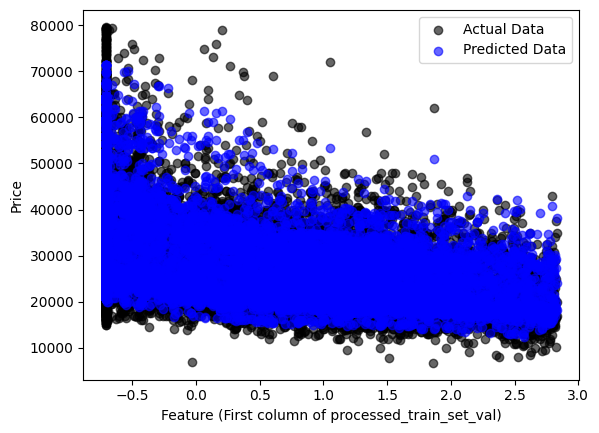

In [86]:
# Predict the prices
predictions = model.predict(processed_train_set_val)

# Select the first column to visualize
x = processed_train_set_val[:, 0].toarray().flatten()  # Convert CSR matrix to 1D array

# Plot scatter of the actual data
plt.scatter(x, train_set_labels, color='black', alpha=0.6, label="Actual Data")

# Plot scatter of predictions instead of connecting them with lines
plt.scatter(x, predictions, color='blue', alpha=0.6, label="Predicted Data")

# Adding labels and legend
plt.xlabel('Feature (First column of processed_train_set_val)')
plt.ylabel('Price')
plt.legend()
plt.show()

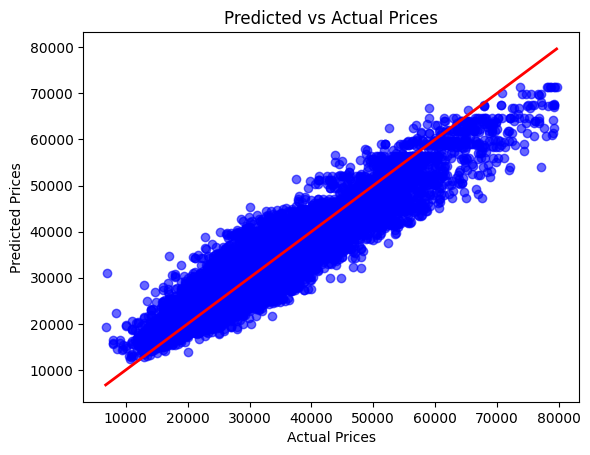

In [87]:
# Plot predicted prices vs actual prices
plt.scatter(train_set_labels, predictions, color='blue', alpha=0.6)
plt.plot([min(train_set_labels), max(train_set_labels)], [min(train_set_labels), max(train_set_labels)], color='red', lw=2)  # Line y=x
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.show()


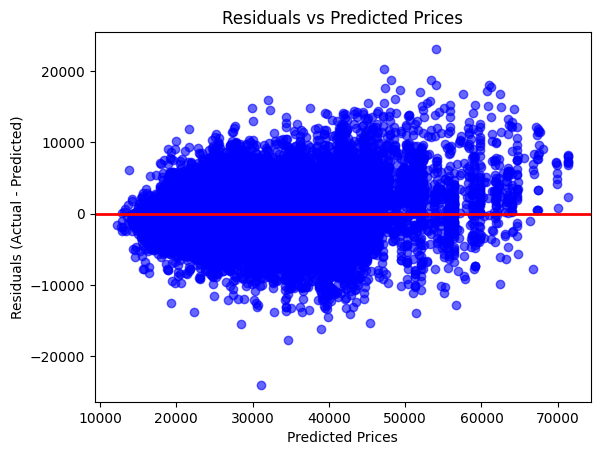

In [88]:
# Calculate residuals
residuals = train_set_labels - predictions

# Plot residuals
plt.scatter(predictions, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', lw=2)  # Zero error line
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs Predicted Prices')
plt.show()


### 4.8.4 Predict on Training Data

In [89]:
print("\nInput data: \n", train_set.iloc[0:9]) # Print the first 9 rows of the input training data

# Print the predictions of the model for the first 9 samples, rounded to 1 decimal place
print("\nPredictions: ", model.predict(processed_train_set_val[0:9]).round(decimals=1))

print("Labels:      ", list(train_set_labels[0:9])) # Print the true labels for the first 9 samples


Input data: 
        back_legroom  bed bed_length        body_type cabin               city  \
94778          39.0  NaN        nan  SUV / Crossover   nan             Boerne   
93624          39.6  NaN        nan  SUV / Crossover   nan        Leavenworth   
5402           36.8  NaN        nan  SUV / Crossover   nan            Du Bois   
10017          39.0  NaN        nan  SUV / Crossover   nan              Utica   
83317          38.7  NaN        nan  SUV / Crossover   nan             Lufkin   
96601          40.7  NaN        nan  SUV / Crossover   nan  Arlington Heights   
97727          39.6  NaN        nan  SUV / Crossover   nan       Libertyville   
90690          38.7  NaN        nan  SUV / Crossover   nan        Marlborough   
75911          38.6  NaN        nan  SUV / Crossover   nan            La Mesa   

       city_fuel_economy  daysonmarket dealer_zip engine_cylinders  ...  \
94778               21.0            38      78006               I4  ...   
93624               23.0

### 4.8.5 Save Models for Comparison

In [90]:
# Save the specified model to a file using the store_model function
# Uncomment the following line to save the model to a file
# store_model(model)

## 4.7 K-fold Cross Validation

> K-Fold Cross-Validation is a technique used to evaluate the performance of a machine learning model by dividing the dataset into k equal parts (folds). 

> The model is trained on all folds besides one is tested on that remaining fold. This process is repeated k times, with each fold being used as the test set once. After all iterations, the results are averaged to get a more reliable estimate of the model’s performance. 

> K-Fold is used to ensure that the model generalizes well to unseen data by utilizing the entire dataset in both training and testing.

In [93]:
from sklearn.model_selection import cross_val_score  # Import cross_val_score for cross-validation

k_fold = KFold(n_splits=5, shuffle=True, random_state=42)  # Create a KFold object for 5-fold cross-validation
  # n_splits=5: Split data into 5 folds
  # shuffle=True: Shuffle data before splitting
  # random_state=42: Set seed for reproducibility

In [109]:
# Evaluate LinearRegression
model_name = "LinearRegression"  # Define the model name
model = LinearRegression()  # Create a LinearRegression model

# Perform cross-validation and compute negative mean squared error
nmse_scores = cross_val_score(model, processed_train_set_val, train_set_labels, cv=k_fold, scoring='neg_mean_squared_error')  # Perform cross-validation with 5 folds

rmse_scores = np.sqrt(-nmse_scores)  # Convert negative MSE to RMSE
joblib.dump(rmse_scores, 'Saved_objects/' + model_name + '_rmse.pkl')  # Save RMSE scores to a file
print("LinearRegression rmse: ", rmse_scores.round(decimals=1))  # Print RMSE scores
print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)), '\n')  # Print average RMSE

LinearRegression rmse:  [4110.2 4241.4 4264.5 4045.2 4201.4]
Avg. rmse:  4172.54 



In [131]:
# Evaluate Ridge Regression
model_name = "Ridge"
model = Ridge()  # Initialize Ridge model with alpha parameter. Adjust alpha as needed.
nmse_scores = cross_val_score(model, processed_train_set_val, train_set_labels, cv=k_fold, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-nmse_scores)  # Convert negative mean squared error to root mean squared error
joblib.dump(rmse_scores, 'Saved_objects/' + model_name + '_rmse.pkl')  # Save RMSE scores to a file
print("Ridge rmse: ", rmse_scores.round(decimals=1))  # Print RMSE scores rounded to one decimal place
print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)), '\n')  # Print average RMSE

Ridge rmse:  [2746.2 2752.6 2792.5 2773.7 2708.5]
Avg. rmse:  2754.7 



In [134]:
# Evaluate Lasso Regression
model_name = "Lasso"
model = Lasso(alpha=0.5, max_iter=20000)  # Initialize Lasso model with alpha parameter. Adjust alpha as needed.
nmse_scores = cross_val_score(model, processed_train_set_val, train_set_labels, cv=k_fold, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-nmse_scores)  # Convert negative mean squared error to root mean squared error
joblib.dump(rmse_scores, 'Saved_objects/' + model_name + '_rmse.pkl')  # Save RMSE scores to a file
print("Lasso rmse: ", rmse_scores.round(decimals=1))  # Print RMSE scores rounded to one decimal place
print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)), '\n')  # Print average RMSE

Lasso rmse:  [2742.  2733.7 2792.1 2769.5 2677.2]
Avg. rmse:  2742.9 



In [132]:
# Evaluate Elastic Net Regression
model_name = "ElasticNet"
model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)  # Initialize Elastic Net model with alpha and l1_ratio parameters. Adjust alpha and l1_ratio as needed.
nmse_scores = cross_val_score(model, processed_train_set_val, train_set_labels, cv=k_fold, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-nmse_scores)  # Convert negative mean squared error to root mean squared error
joblib.dump(rmse_scores, 'Saved_objects/' + model_name + '_rmse.pkl')  # Save RMSE scores to a file
print("ElasticNet rmse: ", rmse_scores.round(decimals=1))  # Print RMSE scores rounded to one decimal place
print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)), '\n')  # Print average RMSE

ElasticNet rmse:  [5879.8 5976.4 6073.4 6018.  5937.8]
Avg. rmse:  5977.08 



In [112]:
# Evaluate DecisionTreeRegressor
model_name = "DecisionTreeRegressor"  # Define the model name
model = DecisionTreeRegressor()  # Create a DecisionTreeRegressor model

# Perform cross-validation and compute negative mean squared error
nmse_scores = cross_val_score(model, processed_train_set_val, train_set_labels, cv=k_fold, scoring='neg_mean_squared_error')  # Perform cross-validation with 5 folds

rmse_scores = np.sqrt(-nmse_scores)  # Compute RMSE from negative MSE scores
joblib.dump(rmse_scores, 'Saved_objects/' + model_name + '_rmse.pkl')  # Save RMSE scores to a file
print("DecisionTreeRegressor rmse: ", rmse_scores.round(decimals=1))  # Print RMSE scores
print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)), '\n')  # Print average RMSE

DecisionTreeRegressor rmse:  [3738.  3701.9 3693.8 3791.5 3769.3]
Avg. rmse:  3738.9 



In [113]:
# Evaluate RandomForestRegressor
model_name = "RandomForestRegressor"  # Define the model name
model = RandomForestRegressor(n_estimators=5)  # Create a RandomForestRegressor model with 5 trees

# Perform cross-validation and compute negative mean squared error
nmse_scores = cross_val_score(model, processed_train_set_val, train_set_labels, cv=k_fold, scoring='neg_mean_squared_error')  # Perform cross-validation with 5 folds

rmse_scores = np.sqrt(-nmse_scores)  # Compute RMSE from negative MSE scores
joblib.dump(rmse_scores, 'Saved_objects/' + model_name + '_rmse.pkl')  # Save RMSE scores to a file
print("RandomForestRegressor rmse: ", rmse_scores.round(decimals=1))  # Print RMSE scores
print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)), '\n')  # Print average RMSE

RandomForestRegressor rmse:  [3140.4 3069.1 3129.  3107.3 3084.6]
Avg. rmse:  3106.08 



In [114]:
# Initialize AdaBoostRegressor
model_name = "AdaBoostRegressor"
model = AdaBoostRegressor(n_estimators=300, learning_rate=0.05, random_state=42)  # Adjust hyperparameters as needed

# Perform cross-validation and compute negative mean squared error
nmse_scores = cross_val_score(model, processed_train_set_val, train_set_labels, cv=k_fold, scoring='neg_mean_squared_error')  # Perform cross-validation with 5 folds

rmse_scores = np.sqrt(-nmse_scores)  # Convert negative MSE to RMSE
joblib.dump(rmse_scores, 'Saved_objects/' + model_name + '_rmse.pkl')  # Save RMSE scores to a file
print("AdaBoostRegressor rmse: ", rmse_scores.round(decimals=1))  # Print RMSE scores
print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)), '\n')  # Print average RMSE

LinearRegression rmse:  [5777.3 5776.5 5908.2 5790.  5793.7]
Avg. rmse:  5809.14 



In [115]:
# Evaluate GradientBoostingRegressor
model_name = "GradientBoostingRegressor"  # Define the model name
model = GradientBoostingRegressor(random_state=42)  # Create a GradientBoostingRegressor model

# Perform cross-validation and compute negative mean squared error
nmse_scores = cross_val_score(model, processed_train_set_val, train_set_labels, cv=k_fold, scoring='neg_mean_squared_error')  # Perform cross-validation with 5 folds

rmse_scores = np.sqrt(-nmse_scores)  # Convert negative MSE to RMSE
joblib.dump(rmse_scores, 'Saved_objects/' + model_name + '_rmse.pkl')  # Save RMSE scores to a file
print("GradientBoostingRegressor rmse: ", rmse_scores.round(decimals=1))  # Print RMSE scores
print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)), '\n')  # Print average RMSE

LinearRegression rmse:  [4036.6 3918.8 4019.4 4001.3 3879.5]
Avg. rmse:  3971.12 



## 4.8 Model Comparision

- After the training and evaluation process for the best model, we have chosen 3 best models: **RandomForestRegressor, RidgeRegressor and GradientBoostingRegressor**. Here's the following reasons:

    - **High Average RMSE**: Average RMSE is to define the difference betwwen predicted and actual values through the K-fold validation. The higher of RMSE is, the worse performance that model can show. Therefore, two models having highest average RMSEs: Elastic Net(Avg. rmse:  5977.08) and AdaBoostRegressor(Avg. rmse:  5809.14), are eliminated.
    
    - DecisionTreeRegressor and GradientBoostingRegressor: Although the average RMSE of DecisionTreeRegressor is better (Avg. rmse:  3738.9 ) than GradientBoostingRegressor(Avg. rmse:  3971.12). However, the **GradientBoostingRegressor can be more efficient** for the following strengths:
        - Stability:GradientBoostingRegressor can build multiple trees at the same time, allowing them to learn from other tree's mistakes to result in combining the trees, and printing out the best result(learning_rate and n_estimators). On the other hand, the DecisionTreeRegressor just simply split out the features and analyze it, consequently make it sensitive to the small changes in the dataset, resulting in poor performance.
        - Adpatability: While the DecisionTreeRegressor relies on each tree's performance without the collaboration, making it more prone to be overfitting the data when growing deep. On the other hand, the GradientBoostingRegressor allows user to modifty the learning_rate and n_estimators based on the dataset's context, making each trees learn from others and perfrom a stastified overall result.
        - Flexibility: The GradientBoostingRegressor can solve the non-linear, complex relationships betwwen each data points, better than a single DecisionTreeRegressor.
    - Therefore, the GradientBoostingRegressor was chosen

- Overall, 3 chosen models that have the best perfomrances are: RidgeRegressor(Avg. rmse: 2754.7 ), RandomForestRegressor(Avg. rmse:  3106.08) and GradientBoostingRegressor(Avg. rmse:  3971.12) for their stability, low average RMSE, and flexibility.

# 5. HYPERPARAMETER TUNING
## 5.0 Import Library

In [60]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
# Set NumPy print options for legacy formatting
np.set_printoptions(legacy='1.25')

In [59]:
def print_search_result(grid_search, model_name = ""): 
    print("\n====== Fine-tune " + model_name +" ======")
    print('Best hyperparameter combination: ',grid_search.best_params_)
    print('Best rmse: ', np.sqrt(-grid_search.best_score_))  
    #print('Best estimator: ', grid_search.best_estimator_) # NOTE: require refit=True in  SearchCV
    print('Performance of hyperparameter combinations:')
    cv_results = grid_search.cv_results_
    for (mean_score, params) in zip(cv_results["mean_test_score"], cv_results["params"]):
        print('rmse =', np.sqrt(-mean_score).round(decimals=1), params) 

## 5.1 Randomized Search

### 5.1.1 Random Forest Regressor 

In [62]:
# Initialize variables to track the best model and score
best_score = float('-inf')  # Initialize best_score to a very low value
best_model = None           # To store the best model
best_model_index = -1       # To store the index of the best model run

# RandomForestRegressor
rf_param_dist = {
    'n_estimators': randint(120, 250),  # Number of trees
    'max_depth': randint(10, 20)  # Maximum depth of the trees
}

for i in range(3):
    print(f"Run {i + 1}:")
    random_state = 42 + i  # Change random_state each run
    rf_search = RandomizedSearchCV(RandomForestRegressor(random_state=random_state), rf_param_dist, n_iter=10, cv=3, scoring='neg_root_mean_squared_error', random_state=42, n_jobs=-1)
    rf_search.fit(processed_train_set_val, train_set_labels)
    
    # Compare and update the best model if the current one is better
    if rf_search.best_score_ > best_score:
        best_score = rf_search.best_score_  # Update best_score
        best_model = rf_search              # Update best_model
        best_model_index = i + 1               # Store the index of the best model run
        
    print("Best parameters for RandomForestRegressor:", rf_search.best_params_)
    print("Best score for RandomForestRegressor:", -rf_search.best_score_)
    print("\n" + "="*50 + "\n")
    
# Save the best model from the three runs
if best_model is not None:
    joblib.dump(best_model, 'saved_objects/RandomForestRegressor_ridgesearch.pkl')
    print_search_result(rf_search, model_name = "RandomForestRegressor")

Run 1:
Best parameters for RandomForestRegressor: {'max_depth': 17, 'n_estimators': 236}
Best score for RandomForestRegressor: 3041.1231323251723


Run 2:
Best parameters for RandomForestRegressor: {'max_depth': 17, 'n_estimators': 236}
Best score for RandomForestRegressor: 3040.343939982215


Run 3:
Best parameters for RandomForestRegressor: {'max_depth': 17, 'n_estimators': 236}
Best score for RandomForestRegressor: 3038.2401353169566



====== Fine-tune RandomForestRegressor ======
Best hyperparameter combination:  {'max_depth': 17, 'n_estimators': 236}
Best rmse:  55.12023344759125
Performance of hyperparameter combinations:
rmse = 55.4 {'max_depth': 16, 'n_estimators': 212}
rmse = 55.2 {'max_depth': 17, 'n_estimators': 140}
rmse = 55.4 {'max_depth': 16, 'n_estimators': 241}
rmse = 57.6 {'max_depth': 12, 'n_estimators': 194}
rmse = 55.1 {'max_depth': 17, 'n_estimators': 236}
rmse = 56.9 {'max_depth': 13, 'n_estimators': 223}
rmse = 55.2 {'max_depth': 17, 'n_estimators': 172}
rmse =

### 5.1.2 Gradient Boosting Regressor

In [63]:
# Initialize variables to track the best model and score
best_score = float('-inf')  # Initialize best_score to a very low value
best_model = None           # To store the best model
best_model_index = -1       # To store the index of the best model run

# GradientBoostingRegressor
gb_param_dist = {
    'n_estimators': randint(120, 220),  # Number of trees
    'learning_rate': uniform(0.01, 0.1),  # Learning rate
    'max_depth': randint(3, 8)  # Maximum depth of the trees
}

for i in range(3):
    print(f"Run {i + 1}:")
    random_state = 42 + i  # Change random_state each run
    gb_search = RandomizedSearchCV(GradientBoostingRegressor(random_state=random_state), gb_param_dist, n_iter=10, cv=3, scoring='neg_root_mean_squared_error', random_state=42, n_jobs=-1)
    gb_search.fit(processed_train_set_val, train_set_labels)
    
    # Compare and update the best model if the current one is better
    if gb_search.best_score_ > best_score:
        best_score = gb_search.best_score_  # Update best_score
        best_model = gb_search              # Update best_model
        best_model_index = i + 1               # Store the index of the best model run
        
    print("Best parameters for GradientBoostingRegressor:", gb_search.best_params_)
    print("Best score for GradientBoostingRegressor:", -gb_search.best_score_)
    print("\n" + "="*50 + "\n")
    
# Save the best model from the three runs
if best_model is not None:
    joblib.dump(best_model, 'saved_objects/GradientBoostingRegressor_ridgesearch.pkl')
    print_search_result(gb_search, model_name = "GradientBoostingRegressor")

Run 1:
Best parameters for GradientBoostingRegressor: {'learning_rate': 0.0831993941811405, 'max_depth': 7, 'n_estimators': 140}
Best score for GradientBoostingRegressor: 3023.1680620593484


Run 2:
Best parameters for GradientBoostingRegressor: {'learning_rate': 0.0831993941811405, 'max_depth': 7, 'n_estimators': 140}
Best score for GradientBoostingRegressor: 3019.6166792262247


Run 3:
Best parameters for GradientBoostingRegressor: {'learning_rate': 0.0831993941811405, 'max_depth': 7, 'n_estimators': 140}
Best score for GradientBoostingRegressor: 3023.2277337241526



====== Fine-tune GradientBoostingRegressor ======
Best hyperparameter combination:  {'learning_rate': 0.0831993941811405, 'max_depth': 7, 'n_estimators': 140}
Best rmse:  54.98388612788435
Performance of hyperparameter combinations:
rmse = 56.2 {'learning_rate': 0.047454011884736254, 'max_depth': 7, 'n_estimators': 134}
rmse = 55.0 {'learning_rate': 0.0831993941811405, 'max_depth': 7, 'n_estimators': 140}
rmse = 60.1 {'

### 5.1.3 Ridge Regression

In [71]:
# Initialize variables to track the best model and score
best_score = float('-inf')  # Initialize best_score to a very low value
best_model = None           # To store the best model
best_model_index = -1       # To store the index of the best model run

ridge_param_dist = {
    'alpha': uniform(1, 1.8)  
}
    
# Ridge Regression
for i in range(3):
    print(f"Run {i + 1}:")
    random_state = 42 + i  # Change random_state each run
    ridge_search = RandomizedSearchCV(Ridge(random_state=random_state), ridge_param_dist, n_iter=10, cv=3, scoring='neg_root_mean_squared_error', random_state=random_state, n_jobs=-1)
    
    # Fit the model to the training data
    ridge_search.fit(processed_train_set_val, train_set_labels)
    
    # Compare and update the best model if the current one is better
    if ridge_search.best_score_ > best_score:
        best_score = ridge_search.best_score_  # Update best_score
        best_model = ridge_search              # Update best_model
        best_model_index = i + 1               # Store the index of the best model run
    
    # Print the best parameters and score for the current model
    print("Best parameters for Ridge:", ridge_search.best_params_)
    print("Best score for Ridge:", -ridge_search.best_score_)  # Negate the score for RMSE
    print("\n" + "="*50 + "\n")

# Save the best model from the three runs
if best_model is not None:
    joblib.dump(best_model, 'Saved_objects/Ridge_ridgesearch.pkl')
    print_search_result(ridge_search, model_name = "Ridge")

Run 1:
Best parameters for Ridge: {'alpha': 2.317589095260529}
Best score for Ridge: 2764.7825278627547


Run 2:
Best parameters for Ridge: {'alpha': 2.320746933304509}
Best score for Ridge: 2764.7710946512484


Run 3:
Best parameters for Ridge: {'alpha': 2.340352867023132}
Best score for Ridge: 2764.7431736990525



====== Fine-tune Ridge ======
Best hyperparameter combination:  {'alpha': 2.340352867023132}
Best rmse:  52.58082515232195
Performance of hyperparameter combinations:
rmse = 52.6 {'alpha': 2.502715867598169}
rmse = 52.8 {'alpha': 1.1886329878657655}
rmse = 52.6 {'alpha': 2.340352867023132}
rmse = 52.6 {'alpha': 1.6489015052613143}
rmse = 52.6 {'alpha': 1.6467595080545294}
rmse = 52.6 {'alpha': 2.0966290851126734}
rmse = 52.6 {'alpha': 1.7088031919588524}
rmse = 52.6 {'alpha': 1.7363306977496176}
rmse = 52.6 {'alpha': 1.9178243372612915}
rmse = 52.6 {'alpha': 2.278266387988732}


## 5.2 Justifications for the Hyperparameters and Value Ranges

> Random search and grid search are two of the most common approaches to configure hyperparameters to suit a dataset. While both shows their effectiveness in tackling the ideal value of hyperparameters for the dataframe, we find random search more suitable for our dataframe processing.<br>

To further develop a machine learning model, hyperparameters must be set to customize the model to the dataset. From their defaults value to the finalized value to best fit the dataframe requires special methods to implement, one of them is random search.<br>
In short, random search optimize the process of finding ideal hyperparameter values by setting up different ranges for each of them. It defines a search space as bounded domains of hyperparameters and will randomly examine a set of hyperparameter combinations within that range to find the best ones.<br>
To fine tune our model, we have the following hyperparameters: 
- Ridge Regression
  - *alpha*: The *alpha* parameter is in charge of the L2 regularization in the model. It prevents overfitting by shrinking large coefficients in the model. 
    - If *alpha* gets closer to 0: The model becomes loose and can lead to more risk of overfitting.
    - If *alpha* gets bigger: The model applies heavy penalties on large values. The cons are the model can become overly restrictive and fails to capture important features from the dataset. 
    - We decide to have 3 trials of fine-tuning hyperparameters to further compare each score to others. 
    - From the training model section, we get an ideal average RMSE score of 2754.7 for the default *alpha* value 1.0. To fully capture the possibilities of the hyperparameter value, we decide to set a specific range, from 0.5 to 1.8. Initially, we set the range from 1 to 10, broad enough to capture the whole data. But the result does not match our ideal RMSE score, so after a few trials, we finally narrow it down to 0.5 and 1.8 bound. 
  - The *n_iter* indicates the number of hyperparameters the random search will use to examine. We set the max_iter to 50, considering the size of the dataset and the broad range.
  - *random_state* is used to stabilize the reproducibility between each run, to make sure that the results do not vary much. The value 42 is a common default random seed. 
  - *cv* = 5 refers to the 5-fold cross validation from the above sections. 
- Random Forest Regression 
  - *n_estimators*: The number of trees in the forest. Each tree learns a part of the model, and the final prediction will be made by combining all trees together. 
    - If *n_estimators* increases: The performance of the model will go up, as increasing trees mean that the model can learn more about the data's patterns. However, up to a point, it can lead to overfitting. 
    - We first initialize the range between 100 and 500 trees, however, the range is too large so it causes overfitting. After a few trials, we narrow it down to 120 to 150.
  - *max_depth*: Sets the maximum depth of each trees in the forest. The path from the root to leaf node represents the depth of the tree. A node, according to each feature, represents a split in the data.
    - Higher *max_depth*: Higher *max_depth* allows more deep and complex trees, making the patterns of the dataframe notable to analyze. By increasing the *max_depth*, the model will split the data, hence tuning improvement.
    - Lower *max_depth*: Lower *max_depth* allows only shallow trees in the model by restricting their complexity. It is useful when it comes to capturing the broad insights of the dataset, but not really effective for deep insights. It can also help to prevent overfitting.  
    - For *max_depth*, we choose the range between 10 and 20 trees because within this range, the provided result shows the best score. <br>
- Gradient Boosting Regression
  - *n_estimator*: The number of trees in the forest. Each tree learns a part of the model, and the final prediction will be made by combining all trees together. 
    - If *n_estimators* increases: The performance of the model will go up, as increasing trees mean that the model can learn more about the data's patterns. However, up to a point, it can lead to overfitting. 
    - We also pick 100 and 500 for the first range, but it is too big for our model. As the final result after trying, we adjust it to 120 and 220 trees. 
  - *max_depth*: Sets the maximum depth of each trees in the forest. The path from the root to leaf node represents the depth of the tree. A node, according to each feature, represents a split in the data.
    - Higher *max_depth*: Higher *max_depth* allows more deep and complex trees, making the patterns of the dataframe notable to analyze. By increasing the *max_depth*, the model will split the data, hence tuning improvement.
    - Lower *max_depth*: Lower *max_depth* allows only shallow trees in the model by restricting their complexity. It is useful when it comes to capturing the broad insights of the dataset, but not really effective for deep insights. It can also help to prevent overfitting.  
    - For *max_depth*, we choose the range between 3 and 8. Unlike 1 to 10 where it provides unmatched results, 3 to 8 provides the best score.
  - *learning_rate*: It is responsible for how much the model changes its shrinkage factor according to the loss gradient while fine-tuning. For boosting model like Gradient Boosting Regression, the relationship between *learning_rate* takes control of the model complexity and performance. 
    - If *learning_rate* increases: Allows trees to contribute more, thus fewer trees needed. However, the risk of overfitting the data exists if the learning rate is too high. 
    - If *learning_rate* decreases: Require more and smaller contribution from each tree, so more trees need to be added in gradually. 
    - From 0.01 to 0.1 is the range that we pick for *learning_rate*, as this generalized approach already provides us with an ideal score.

# 6. MODEL TESTING AND ANALYSIS
## 6.1 Model Dictionary

In [69]:
# Dictionary to store model names and their respective file paths
models_info = {
    'Ridge': 'Saved_objects/Ridge_ridgesearch.pkl',
    'RandomForest': 'Saved_objects/RandomForestRegressor_ridgesearch.pkl',
    'GradientBoosting': 'Saved_objects/GradientBoostingRegressor_ridgesearch.pkl'
}

## 6.2 Model Evaluation Function

In [66]:
from sklearn.metrics import mean_absolute_error

def evaluate_model_performance(model, model_name, processed_test_set, test_set_labels):
    print(f'\nTesting {model_name}...')

    # Calculate R², MAE, MSE, RMSE
    r2score = model.score(processed_test_set, test_set_labels)
    predictions = model.predict(processed_test_set)
    mae = mean_absolute_error(test_set_labels, predictions)
    mse = mean_squared_error(test_set_labels, predictions)
    rmse = np.sqrt(mse)
    
    # Print out performance metrics
    print(f"Performance on test data for {model_name}:")
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Square Error (RMSE):", rmse)
    print('R² score (on test data, best=1):', r2score)
    
    # Print out first 9 rows of test data, predictions, and actual labels
    print("\nTest data (first 9 rows):\n", test_set.iloc[0:9])
    print(f"\n{model_name} Predictions (first 9 rows):", predictions[0:9].round(decimals=1))
    print("True Labels (first 9 rows):", list(test_set_labels[0:9]), '\n')

## 6.3 Pipeline Preparation

In [67]:
# Load the full preprocessing pipeline
full_pipeline = joblib.load('Models/full_pipeline.pkl')

# Preprocess the test set using the saved pipeline
processed_test_set = full_pipeline.transform(test_set)  

## 6.4 Testing and Analysis Process
### 6.4.1 Implementation Process

In [74]:
print('\n____________ ANALYZE AND TEST YOUR SOLUTION __________')

# Loop through each model
for model_name, model_path in models_info.items():
    # Load the saved model
    search = joblib.load(model_path)
    best_model = search.best_estimator_
    print('SOLUTION: ' , best_model)

    # Gain insights and print features (e.g., coefficients or feature importances)
    if model_name == 'Ridge':
        coefficients = best_model.coef_
        # Process the feature names (combine binarized and OneHot features)
        onehot_cols = []
        for val_list in full_pipeline.transformer_list[1][1].named_steps['cat_encoder'].categories_:
            onehot_cols += val_list.tolist()
        feature_names = train_set.columns.tolist() + ["power_to_displacement", "mileage_per_day", "average_fuel_economy"] + onehot_cols
        for name in categorial_feat_names:
            if name in feature_names:
                feature_names.remove(name)
        feature_importances = sorted(zip(feature_names, coefficients.round(decimals=4)), key=lambda row: abs(row[1]), reverse=True)
        print("Top 10 features by coefficients in Ridge Regression:")
        for feature, coef in feature_importances[:10]:
            print(f"{feature}: {coef}")
    elif model_name in ['RandomForest', 'GradientBoosting']:
        feature_importances = best_model.feature_importances_
        # Process the feature names for RandomForest and GradientBoosting
        onehot_cols = []
        for val_list in full_pipeline.transformer_list[1][1].named_steps['cat_encoder'].categories_:
            onehot_cols += val_list.tolist()
        feature_names = train_set.columns.tolist() + ["power_to_displacement", "mileage_per_day", "average_fuel_economy"] + onehot_cols
        for name in categorial_feat_names:
            if name in feature_names:
                feature_names.remove(name)
        feature_importances = sorted(zip(feature_names, feature_importances.round(decimals=4)), key=lambda row: row[1], reverse=True)
        print(f"Top 10 features by importance in '{model_name}':")
        for feature, importance in feature_importances[:10]:
            print(f"{feature}: {importance}")

    # Evaluate and print performance metrics
    evaluate_model_performance(best_model, model_name, processed_test_set, test_set_labels)


____________ ANALYZE AND TEST YOUR SOLUTION __________
SOLUTION:  Ridge(alpha=2.340352867023132, random_state=44)
Top 10 features by coefficients in Ridge Regression:
Sport S 4WD: 8018.3431
2018: 7564.9366
Lounge FWD: -7487.2327
Reserve FWD: 7477.2876
Q3: 7171.1398
2017: 6528.426
HSE Luxury AWD: 6365.6474
XC90: 6310.1774
2.0T Premium AWD: -6292.1678
Jaguar: 6236.1609

Testing Ridge...
Performance on test data for Ridge:
Mean Absolute Error (MAE): 9247.284301927037
Mean Squared Error (MSE): 102670820.85745855
Root Mean Square Error (RMSE): 10132.661094572271
R² score (on test data, best=1): 0.12275933826120178

Test data (first 9 rows):
        back_legroom  bed  bed_length        body_type cabin  \
26092          35.3  NaN         NaN  SUV / Crossover   NaN   
87168          36.0  NaN         NaN  SUV / Crossover   NaN   
29259          38.0  NaN         NaN  SUV / Crossover   NaN   
90420          38.6  NaN         NaN  SUV / Crossover   NaN   
79758          37.6  NaN         NaN  S

### 6.4.2 Problem Summary
- In this analysis, we aim to predict used car prices by employing three different machine learning models: Ridge Regression, RandomForestRegressor, and GradientBoostingRegressor. 

- The dataset contains a diverse set of features related to the specifications of vehicles such as legroom, fuel economy, engine performance, etc... 

- The goal of this task is to evaluate the performance of each model, assess the accuracy of the predictions, and gain insights into which factors most influence the price of used cars. By comparing the results, we can determine which model performs best and how effectively it captures the trends within the dataset.

### 6.4.3 Model Performance Comparison
1. Ridge Regression 
- Performance on Test Data:
  - Mean Absolute Error (MAE): 9247.28
  - Root Mean Square Error (RMSE): 10132.66
  - R² score: 0.1228 (Very low, indicating poor performance)
  Insights: 
  - Ridge Regression performs poorly on the test set, with only 13% accuracy according to the R² score. This may caused by overfitting, and lead to the model skipping important patterns of the data. 
  - The MAE and RMSE value is significantly high, suggesting that the model's predictions are very far from the real value.
  
2. Random Forest Regression 
- Performance on Test Data:
  - Mean Absolute Error (MAE): 2461.17
  - Root Mean Square Error (RMSE): 3416.69
  - R² score: 0.9003 (Strong performance)
- Insights:
  - Random Forest performs significantly well on the test data, with a high value of 90% accuracy according to the R² score, highest among all three. 
  - The MAE and RMSE are far lower than that of Ridge Regression, showing that the model predictions is precise and near the actual value.
  
3. Gradient Boosting Regression 

- Performance on Test Data: 
  - Mean Absolute Error (MAE): 2825.28
  - Root Mean Square Error (RMSE): 3878.41
  - R² score: 0.8715 (Strong performance)
- Insights: 
  - Random Forest performs significantly well on the test data, with a high value of 87% accuracy according to the R² score, second highest among all three. 
  - The MAE and RMSE are far lower than that of Ridge Regression, showing that the model predictions is precise and near the actual value."

### 6.4.4 Feature Importance and Insights

- In addition to showing superiority in the index compared to Ridge, Gradient Boosting Regressor and Random Forest Regressor both rank the features in the most important positions similarly, such as front_legroom, back_legroom, width and seller_rating.

- The influence of these features is as follows:

    - Front_legroom and back_legroom (legroom) play the most important role with the ratio of up to 37%, 9%, 36% and 13% respectively for the 2 models. This shows that the comfort of customers on the journey is the strongest factor affecting the value of the car.

    - Width (width of the car) is also one of the important features with the ratio of 13% and 12% respectively, which directly affects the convenience and usable space inside the car.

    - Seller_rating (7-8%) represents one of the important indicators of seller reputation, which significantly affects consumers' decision to buy a car.

- Other features such as horsepower, highway_fuel_economy, and daysonmarket (number of days on the market) play a smaller, but still significant role, reflecting the car's performance and time on the market, respectively.

### 6.4.5 Result Conclusion

- In summary, the RandomForestRegressor outperformed the other models in terms of accuracy and error metrics, making it the most suitable model for predicting used car prices in this project. With a high R2 score of 0.9 and the lowest MAE and RMSE values, RandomForestRegressor was able to capture the non-linear relationships in the dataset more effectively than other models. GradientBoostingRegressor also delivered strong results, making it a reliable alternative in performance. On the other hand, Ridge Regression underperformed when it comes to modelling the complex patterns in the dataset, resulting in the lowest accuracy. 

- Moving forward, further improvements could be made by fine-tuning the hyperparameters of the models or working with other advanced models. However, based on the current findings, RandomForestRegressor stands out as the best-performing model in this project.

## 6.5 Further Discussion
Despite the efforts made in building the model, there are still limitations in its performance due to several factors. Here are some of the reasons that limit the model’s performance from reaching expected outcomes efficiently and accurately in predictions:

-<strong> Data Type's Unsuitability</strong>: Some of the features's data types in its orginial form might not be interpretable for model-running, resulting in poor performance on predictions (such as city_fuel_economy, daysonmarket, horsepower and so on). It means requiring specific transformations to make it usable for the model-running.

-<strong> Data Inaccuracy and Highly-complex Data's features</strong>:  A significant number of features, such as city_fuel_economy ,daysonmarket, fuel_tank_volume and so on, contain outliers and missing values, the values that are not following the overall pattern of the data, which could result in distorting model's ability to predict reliably. Morover, the extremly numerous of entries within the dataset (100,000 before processing) could make the common outliers handling procedures harder, resulting in poorer performance on the model's predictions.

-<strong> Noisy and insignificant features</strong>: Noisy features can contain unrelated or errors that do not contribute positively to the prediction process, and even features with high variation can result in creating a skew in the model's prediction that causes the model's inaccuracy. Additionally, the small sample size for important features could limit the model's potential.

-<strong> Real-world context and external factors</strong>: Real-world factors can have a significant impact on the model's future performace (eg time of listing, dealership and so on). Moreoever, external factors within the real-world context can reduce the model's prediction accuracy, while theoretically works well with the given dataset.

To address the challenges mentioned above and improve performance, the following recommendations are made:
-	<strong>Remove outliers and unnecessary features</strong>: Outliers and irrelevant features should be carefully removed or treated. Removing outliers ensures that the model is trained on a cleaner dataset, free from extreme values that could distort learning. Furthermore, eliminating unnecessary features that do not contribute significantly to the prediction can help reduce noise which improves accuracy. This step also involves addressing missing values, particularly for crucial features, to ensure that the model has enough information to make reliable predictions. Also, the outliers should be handled by checking repeatedly for outliers limit to remove manually the outliers within that range.
-   <strong>Features Transformation</strong>: For unsuitable or unintepretable features, using Log or Square Root Tranformation methods to process the features's data (such as city_fuel_economy, daysonmarket, horsepower and so on ). This could result in processing important features's data, and improving the model's performance significantly.
-	<strong>More samples for necessary features</strong>: Increasing the number of samples for important features will enhance the model's learning ability and improve its evaluation metrics. A larger dataset will allow the model to identify patterns more effectively, leading to more accurate predictions. This is especially important for features that have too few samples, as small sample sizes can lead to biased or unreliable predictions. By providing more samples, the model can generalize better and perform more consistently across different datasets.

# 7. REFERENCE

[1] Mital, A., Sep 21, 2020, "US Used Cars Dataset," Kaggle. [Online]. Available: https://www.kaggle.com/datasets/ananaymital/us-used-cars-dataset?select=used_cars_data.csv

[2] Atlassian. "Histogram Complete Guide." Atlassian. Accessed: Sep. 8, 2024. [Online]. Available: https://www.atlassian.com/data/charts/histogram-complete-guide

[3] Voxco. "Categorical Data vs Numerical Data." Voxco. Accessed: Sep. 8, 2024. [Online]. Available: https://www.voxco.com/blog/categorical-data-vs-numerical-data/#:~:text=Definition-,Categorical%20data%20refers%20to%20a%20data%20type%20that%20can%20be,any%20language%20or%20descriptive%20form

[4] Scikit-learn. "sklearn.ensemble.AdaBoostRegressor." Scikit-learn. Accessed: Sep. 8, 2024. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html

[5] Scikit-learn. "sklearn.ensemble.GradientBoostingRegressor." Scikit-learn. Accessed: Sep. 8, 2024. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

[6] Scikit-learn. "sklearn.linear_model.Ridge." Scikit-learn. Accessed: Sep. 8, 2024. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

[7] Scikit-learn. "sklearn.linear_model.Lasso." Scikit-learn. Accessed: Sep. 8, 2024. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

[8] Scikit-learn. "sklearn.linear_model.ElasticNet." Scikit-learn. Accessed: Sep. 8, 2024. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

[9]mohitg593. "R Squared | Coefficient of Determination" geeksforgeeks. Date Accessed: Sep. 9, 2024. [Online]. Available: https://www.geeksforgeeks.org/r-squared/

[10] B.Zach."MSE vs. RMSE: Which Metric Should You Use?" statology. Date Accessed: Sep.9, 2024. [Online]. Available
https://www.statology.org/mse-vs-rmse/?fbclid=IwZXh0bgNhZW0CMTEAAR0066bVCUalZLeJmroeGxv_Yn5wbWweqOBubf_AxX7CERvD8PQwxVnPB50_aem_hJu_dPl4q1rJkceDUxgZxQ

[11] statisticshowto. "Absolute Error & Mean Absolute Error (MAE)" statisticshowto. Date Accessed: Sep. 9, 2024. [Online]. Available: https://www.statisticshowto.com/absolute-error/?fbclid=IwZXh0bgNhZW0CMTEAAR038KQBnW21YtgCLrcfYWyYT-qvILb4zcH7zJb63d_IUDGCinDztLbrQTM_aem_CDUBwK6oCs_HRB0Cw2bfEw

# 8. PROJECT CONTRIBUTION
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Project Contribution</title>
</head>
<body>
    <table style="margin-left:auto; margin-right:auto;">
        <thead>
            <tr>
                <th colspan="5" style="text-align:center;"><strong>PROJECT CONTRIBUTION</strong></th>
            </tr>
            <tr>
                <th style="text-align:center;"><strong>Student ID</strong></th>
                <th style="text-align:center;"><strong>Student Name</strong></th>
                <th style="text-align:center;"><strong>Contribution Rate<br/>(1 - 100%)</strong></th>
                <th style="text-align:center;"><strong>Responsible for (Part, Cells,...)</strong></th>
                <th style="text-align:center;"><strong>Note</strong></th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>s3914633</td>
                <td>Tran Dong Nghi</td>
                <td>100%</td>
                <td>
                    - Load the data set to Jupyter<br/>
                    - Explore, analyse and visualize the dataset<br/>
                    - Analyse the correlation<br/>
                    - Handle missing values, outliers<br/>
                    - Training 6 models<br/>
                    - Program K-fold validation<br/>
                    - Use random search to fine tune the hyperparameters<br/>
                    - Test the best model<br/>
                    - Conclude the Jupyter notebook file and format it
                </td>
                <td>Team Leader</td>
            </tr>
            <tr>
                <td>s3994909</td>
                <td>Vo Thuy Khanh Ngoc</td>
                <td>100%</td>
                <td>
                    - Find the suitable visualize charts<br/>
                    - Identify and handle outliers<br/>
                    - Encode categorical features<br/>
                    - Choose one model<br/>
                    - Analyse the model's performance and gain insights
                </td>
                <td>Team Member</td>
            </tr>
            <tr>
                <td>s4032968</td>
                <td>Ho Thanh Hoa</td>
                <td>100%</td>
                <td>
                    - Find missing values in the dataset<br/>
                    - Choose one model<br/>
                    - Evaluate the model's performance<br/>
                    - Discuss the potential limitations and areas for improvement<br/>
                    - References management
                </td>
                <td>Team Member</td>
            </tr>
            <tr>
                <td>s4021263</td>
                <td>Chan Yong Park</td>
                <td>100%</td>
                <td>
                    - Gain insights into data distributions, features' relationships, and potential challenges<br/>
                    - Choose one model<br/>
                    - Discuss the result of evaluating the model's performance<br/>
                    - Define K-fold validation<br/>
                    - Provide justifications for the hyperparameters and value ranges
                </td>
                <td>Team Member</td>
            </tr>
        </tbody>
    </table>

</body>
</html>